# Insurance Claims- Fraud Detection


Problem Statement:


Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

# Solution:-

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline

In [2]:
df= pd.read_csv('Automobile_insurance_fraud.csv')


In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [5]:
#getting columns names
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.shape

(1000, 40)

In [8]:
#getting information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:
#checking datatypes
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [11]:
# check missing values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

observation:-only _c39 has 1000 null values we will delete this column.

In [12]:
df.drop('_c39',axis=1,inplace=True)


<AxesSubplot:>

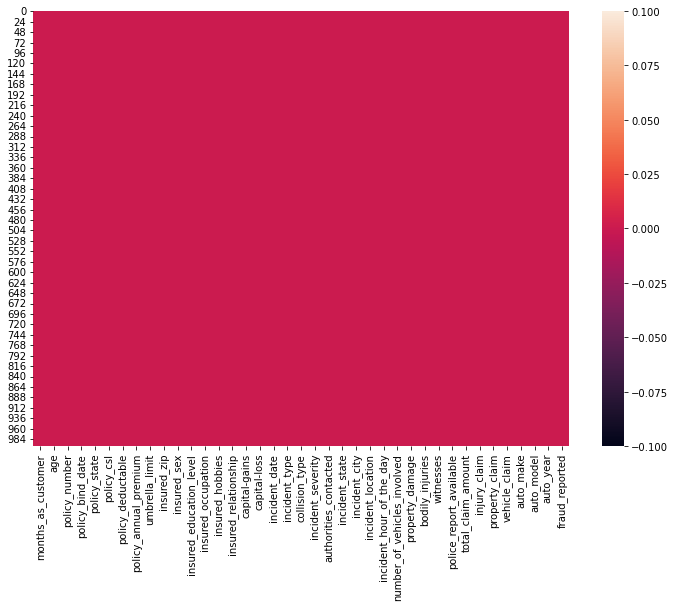

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

# Exploratory Data Analysis:


In [15]:
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']

In [18]:
print(f'Number of Categorical features: {len(catg_features)}')
print(f'Number of Continuous features: {len(cont_features)}')

Number of Categorical features: 21
Number of Continuous features: 18


In [19]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [20]:
#Target Variable - Fraud Detected
df['fraud_reported'].value_counts(dropna=False)


N    753
Y    247
Name: fraud_reported, dtype: int64

In [21]:
target_df=df['fraud_reported'].value_counts()*100/df.shape[0]
target_df

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

In [22]:
df['fraud_reported'].value_counts(normalize=True)*100


N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

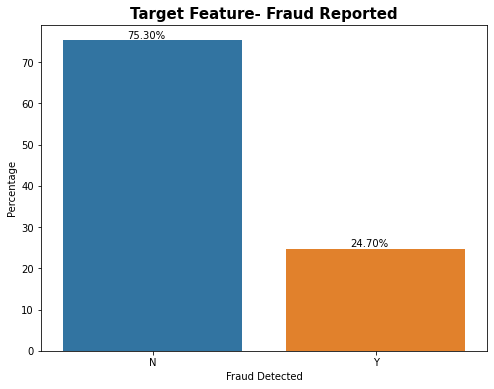

In [23]:
plt.figure(figsize=(8,6))
plt.title("Target Feature- Fraud Reported",fontdict={'fontweight':'bold','fontsize':15})
ax=sns.barplot(x=target_df.index,y=target_df.values)
plt.xlabel('Fraud Detected')
plt.ylabel('Percentage')

for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    x,_=p.get_xy()
    ax.text(x+width/2.8,height+0.5,f'{height:.2f}%')

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

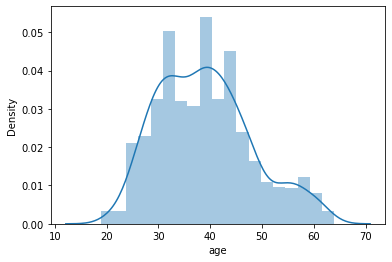

In [24]:
#Age and age vs target column
sns.distplot(df['age'])


Text(0, 0.5, 'Fraud Reported')

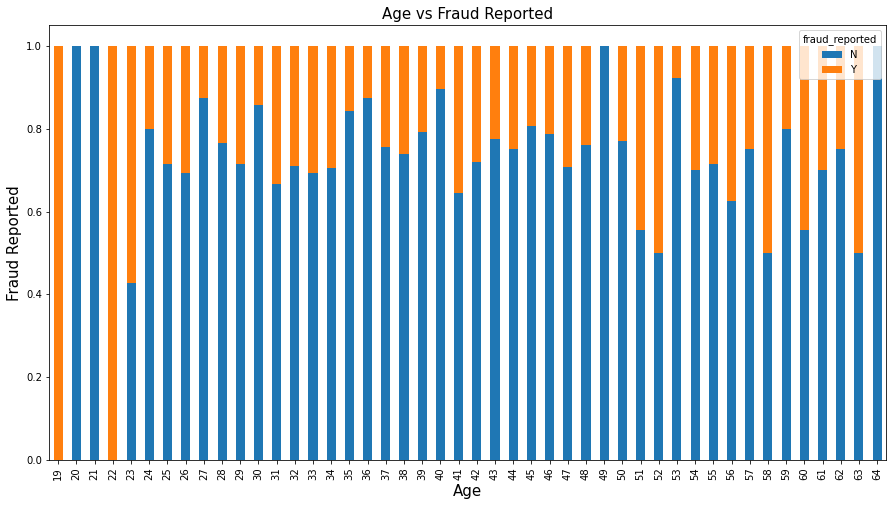

In [26]:
plt.rcParams['figure.figsize'] = [15, 8]
table=pd.crosstab(df['age'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Age vs Fraud Reported',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Fraud Reported',fontsize=15)

In [27]:
#policy_number
df['policy_number'].nunique()


1000

In [28]:
#policy_bind_date
df['policy_bind_date'].nunique()



951

In [29]:
df['policy_bind_date'].value_counts(dropna=False)


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


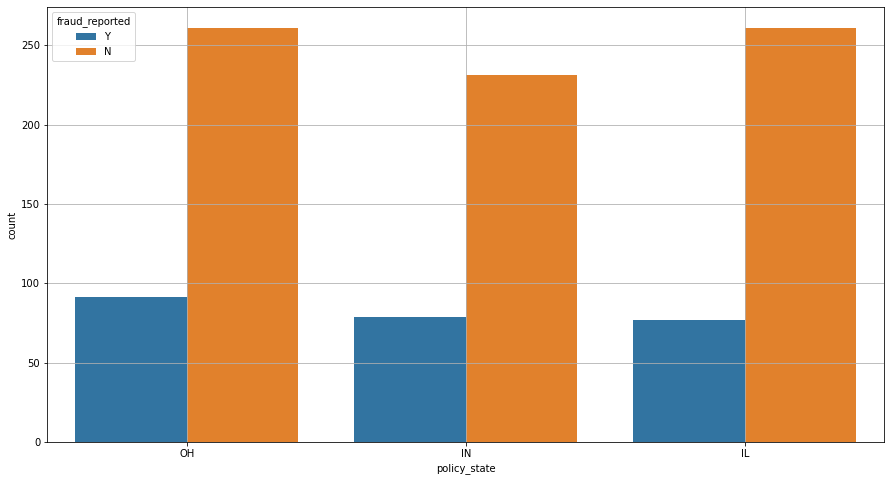

In [30]:
#policy_state
sns.countplot(df['policy_state'],hue=df['fraud_reported'])
plt.grid()

Text(0, 0.5, 'Fraud Reported')

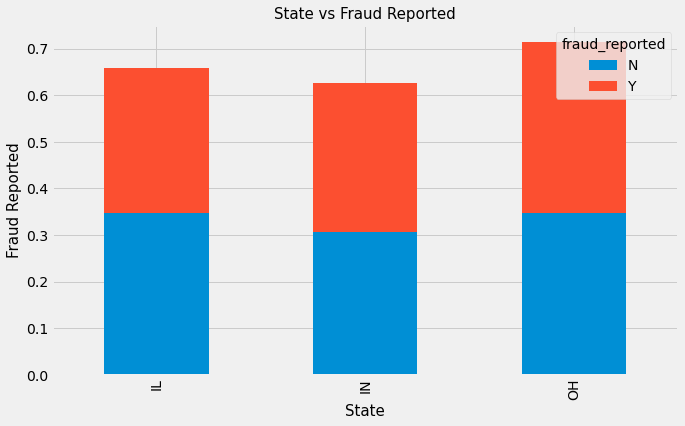

In [31]:
plt.rcParams['figure.figsize']=[10,6]
plt.style.use('fivethirtyeight')   #538
table=pd.crosstab(df['policy_state'],df['fraud_reported'])
table.div(table.sum(0),axis=1).plot(kind='bar',stacked=True)
plt.title('State vs Fraud Reported',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Fraud Reported',fontsize=15)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_state', ylabel='count'>

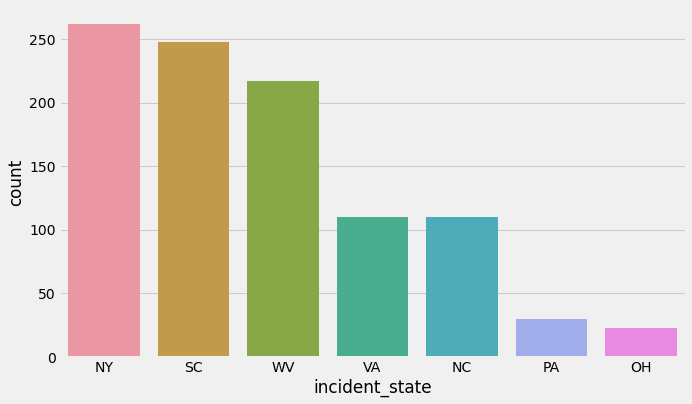

In [33]:
#incident_state vs Tar4get variable
sns.countplot(df['incident_state'],order=df['incident_state'].value_counts().index)


In [34]:
df['incident_state'].value_counts()


NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, '25-01-2015'),
  Text(1, 0, '21-01-2015'),
  Text(2, 0, '22-02-2015'),
  Text(3, 0, '10-01-2015'),
  Text(4, 0, '17-02-2015'),
  Text(5, 0, '02-01-2015'),
  Text(6, 0, '13-01-2015'),
  Text(7, 0, '27-02-2015'),
  Text(8, 0, '30-01-2015'),
  Text(9, 0, '05-01-2015'),
  Text(10, 0, '06-01-2015'),
  Text(11, 0, '15-02-2015'),
  Text(12, 0, '22-01-2015'),
  Text(13, 0, '08-01-2015'),
  Text(14, 0, '15-01-2015'),
  Text(15, 0, '29-01-2015'),
  Text(16, 0, '19-01-2015'),
  Text(17, 0, '01-01-2015'),
  Text(18, 0, '10-02-2015'),
  Text(19, 0, '11-01-2015'),
  Text(20, 0, '24-02-2015'),
  Text(21, 0, '09-01-2015'),
  Text(22, 0, '28-01-2015'),
  Text(23, 0, '07-01-2015'),
  Text(24, 0, '18-01-2015'),
  Text(25, 

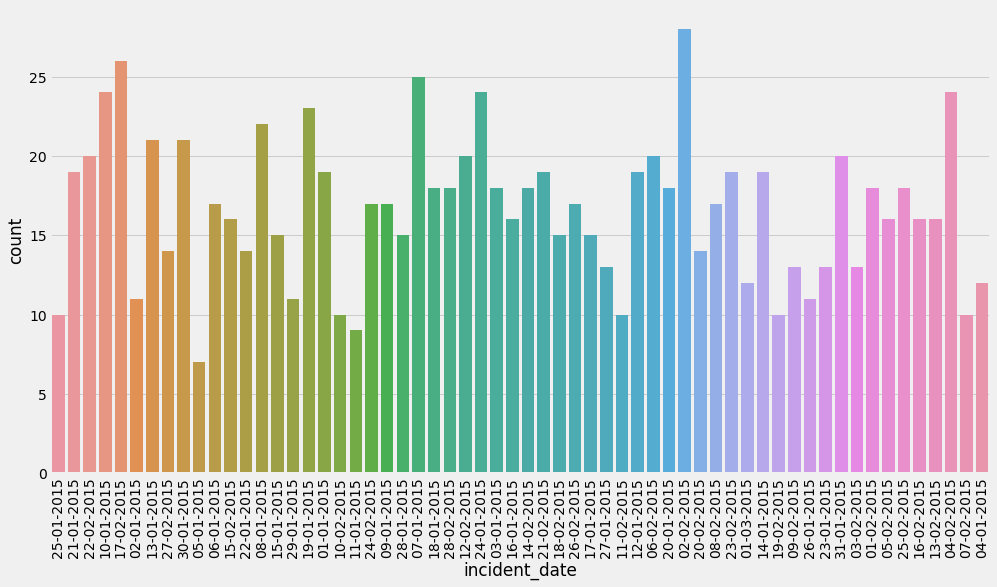

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(df['incident_date'])
plt.xticks(rotation = 90)

In [36]:
#incident_type vs fraud
df['incident_type'].unique()



array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_type', ylabel='count'>

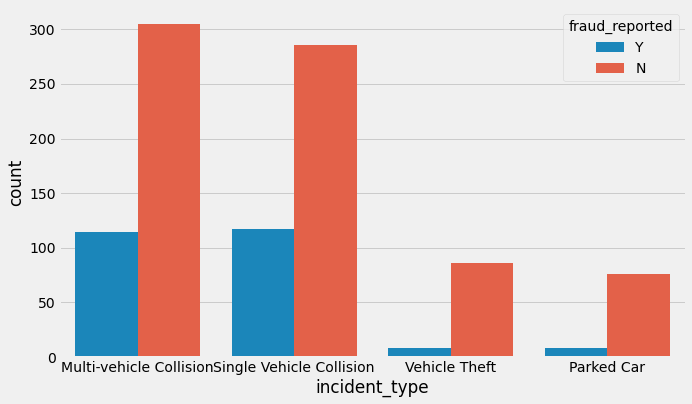

In [37]:
sns.countplot(df['incident_type'], order=df['incident_type'].value_counts().index,hue=df['fraud_reported'])


Text(0, 0.5, 'Percentage ')

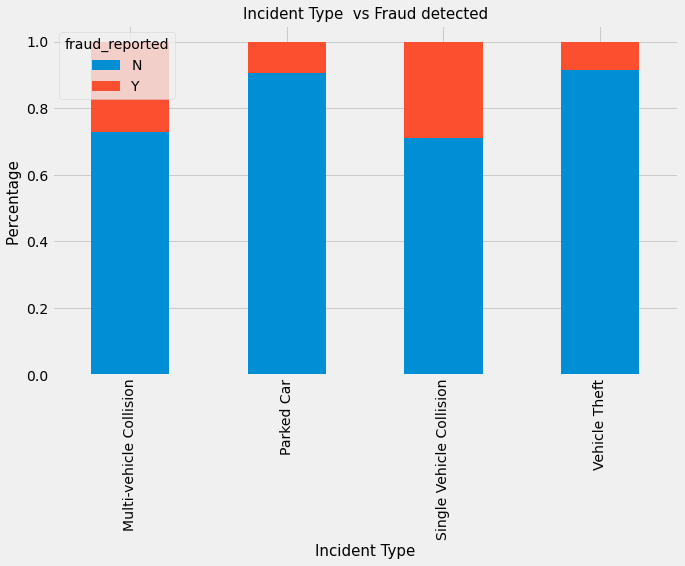

In [38]:
table=pd.crosstab(df['incident_type'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title("Incident Type  vs Fraud detected",fontsize=15)
plt.xlabel('Incident Type',fontsize=15)
plt.ylabel('Percentage ',fontsize=15)

In [39]:
#collision_type
df['collision_type'].unique()


array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [40]:
df['collision_type'].value_counts(dropna=False)


Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [41]:
df['collision_type'].replace('?',np.nan,inplace=True)


In [42]:
df['collision_type'].value_counts(dropna=False)


Rear Collision     292
Side Collision     276
Front Collision    254
NaN                178
Name: collision_type, dtype: int64

Text(0, 0.5, 'Percentage ')

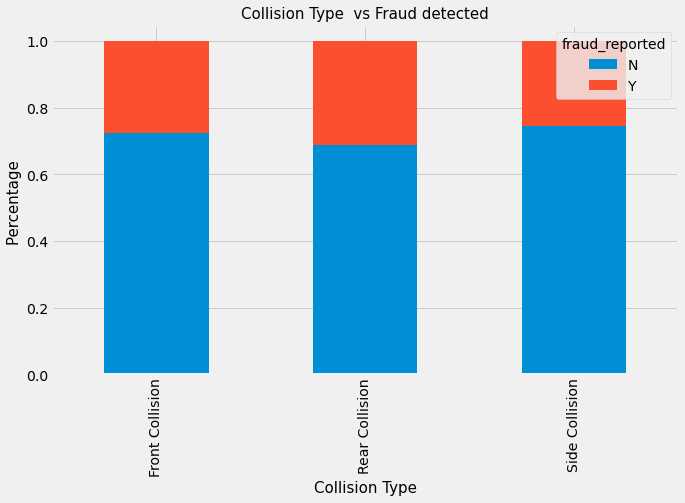

In [43]:
table=pd.crosstab(df['collision_type'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title("Collision Type  vs Fraud detected",fontsize=15)
plt.xlabel('Collision Type',fontsize=15)
plt.ylabel('Percentage ',fontsize=15)

In [44]:
#incident_severity
df['incident_severity'].unique()


array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [45]:
df['incident_severity'].value_counts(normalize=True)


Minor Damage      0.354
Total Loss        0.280
Major Damage      0.276
Trivial Damage    0.090
Name: incident_severity, dtype: float64

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_severity', ylabel='count'>

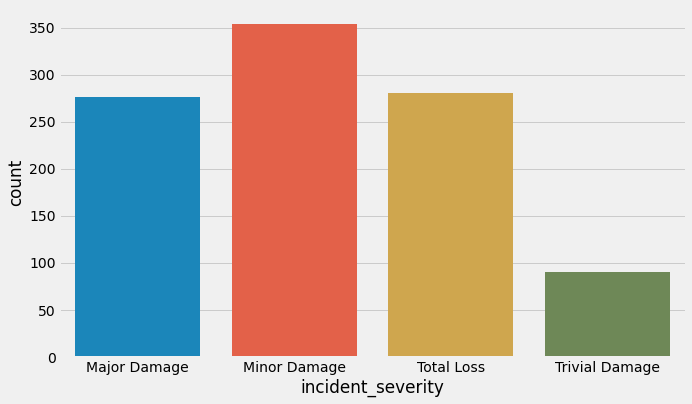

In [46]:
sns.countplot(df['incident_severity'])


C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_severity', ylabel='count'>

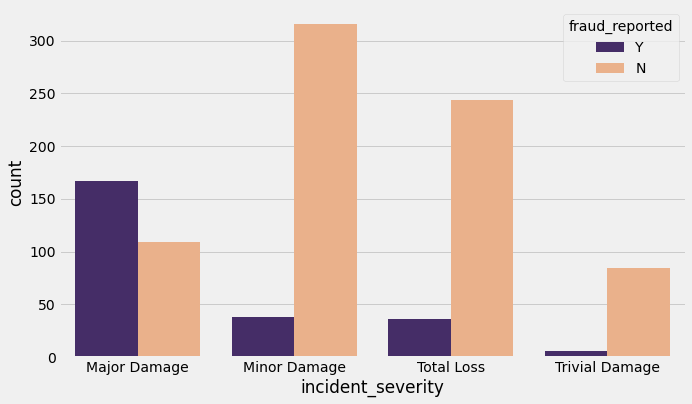

In [47]:
sns.countplot(df['incident_severity'],hue=df['fraud_reported'],palette=['#432371',"#FAAE7B"])


In [49]:
#authorities_contacted vs fraud_reported
df['authorities_contacted'].unique()



array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

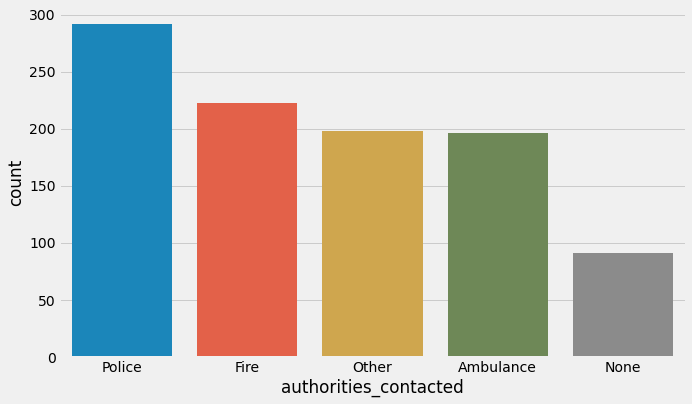

In [50]:
sns.countplot(df['authorities_contacted'], order=df['authorities_contacted'].value_counts().index)


In [51]:
df['authorities_contacted'].value_counts(normalize=True)*100


Police       29.2
Fire         22.3
Other        19.8
Ambulance    19.6
None          9.1
Name: authorities_contacted, dtype: float64

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

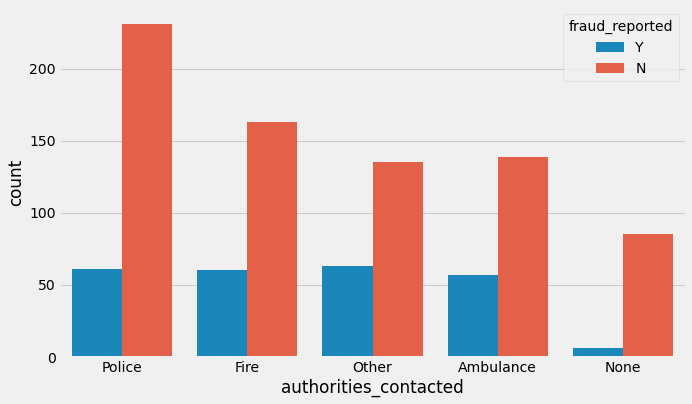

In [52]:
sns.countplot(df['authorities_contacted'], order=df['authorities_contacted'].value_counts().index, hue=df['fraud_reported'])


In [53]:
#number_of_vehicles_involved
df['number_of_vehicles_involved'].unique()


array([1, 3, 4, 2], dtype=int64)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

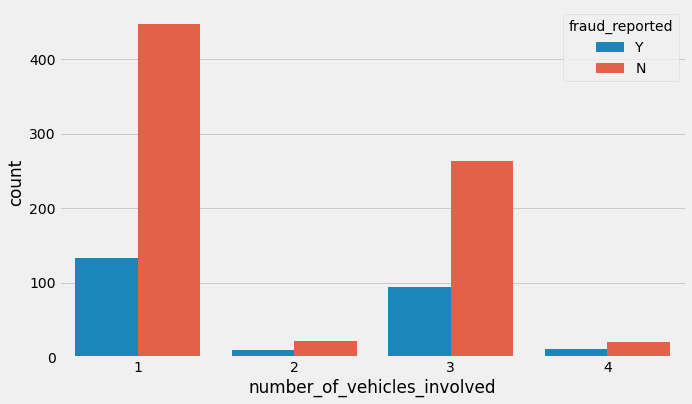

In [54]:
sns.countplot(df['number_of_vehicles_involved'], hue=df['fraud_reported'])


In [55]:
#property_damage
df['property_damage'].unique()




array(['YES', '?', 'NO'], dtype=object)

In [57]:
df['property_damage'].replace('?',np.nan, inplace=True)


In [58]:
df['property_damage'].unique()


array(['YES', nan, 'NO'], dtype=object)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_damage', ylabel='count'>

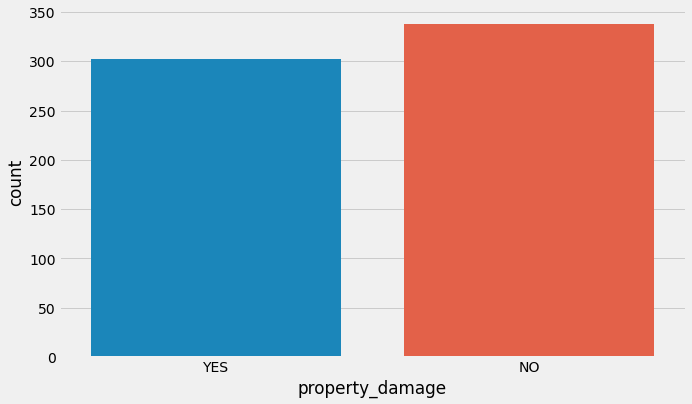

In [59]:
sns.countplot(df['property_damage'])


C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_damage', ylabel='count'>

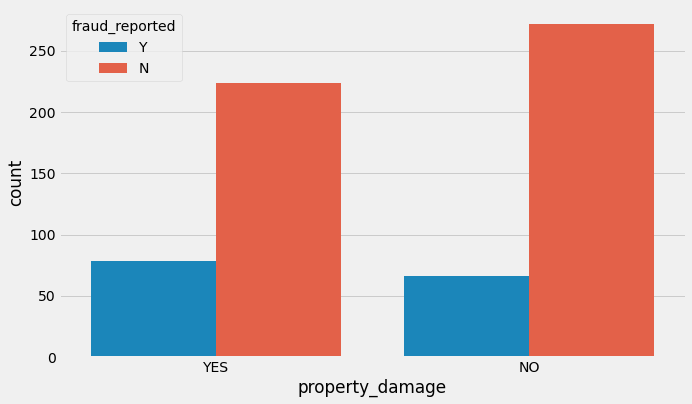

In [62]:
sns.countplot(df['property_damage'],hue=df['fraud_reported'])


In [63]:
df.groupby('property_damage')['fraud_reported'].value_counts()


property_damage  fraud_reported
NO               N                 272
                 Y                  66
YES              N                 224
                 Y                  78
Name: fraud_reported, dtype: int64

In [64]:
df.replace('?',np.nan,inplace=True)


In [65]:
#bodily_injuries
df['bodily_injuries'].unique()


array([1, 0, 2], dtype=int64)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

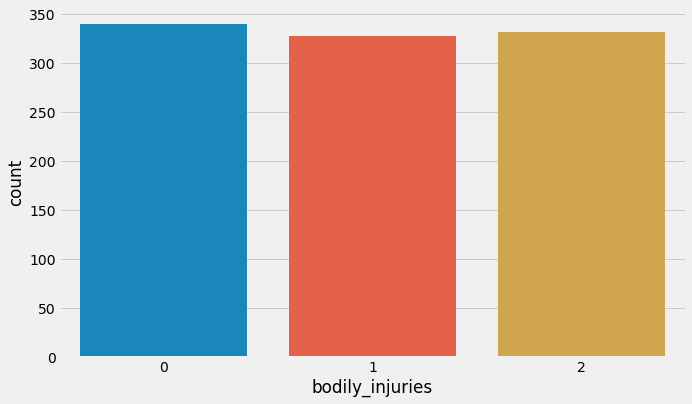

In [67]:
sns.countplot(df['bodily_injuries'])


C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

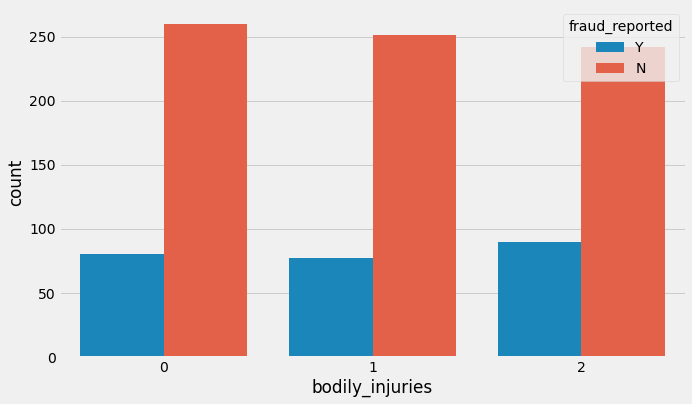

In [68]:
sns.countplot(df['bodily_injuries'],hue=df['fraud_reported'])


In [70]:
#witnesses
df['witnesses'].unique()


array([2, 0, 3, 1], dtype=int64)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='witnesses', ylabel='count'>

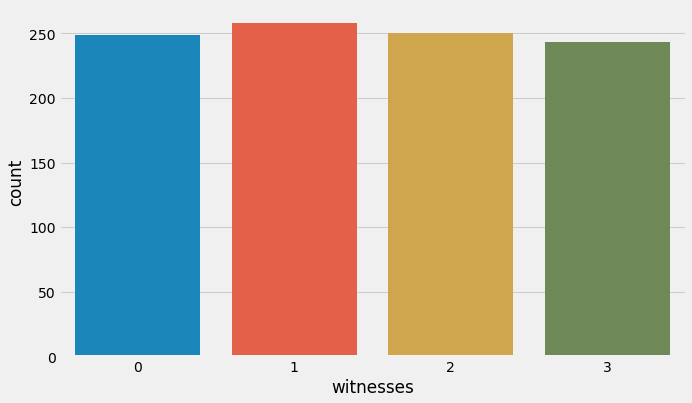

In [71]:
sns.countplot(df['witnesses'])


C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='witnesses', ylabel='count'>

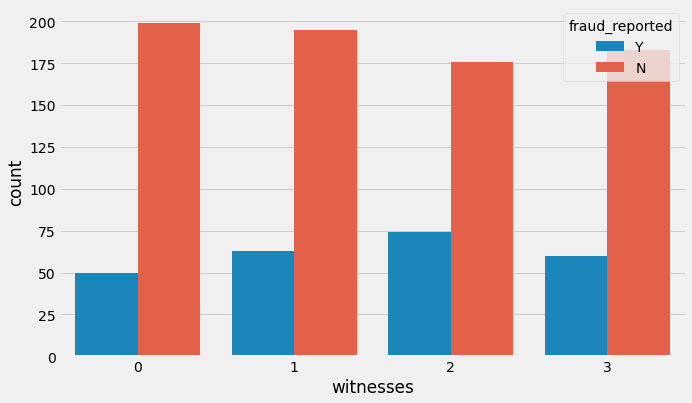

In [72]:
sns.countplot(df['witnesses'],hue=df['fraud_reported'])


In [73]:
#police_report_available
df['police_report_available'].unique()



array(['YES', nan, 'NO'], dtype=object)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='police_report_available', ylabel='count'>

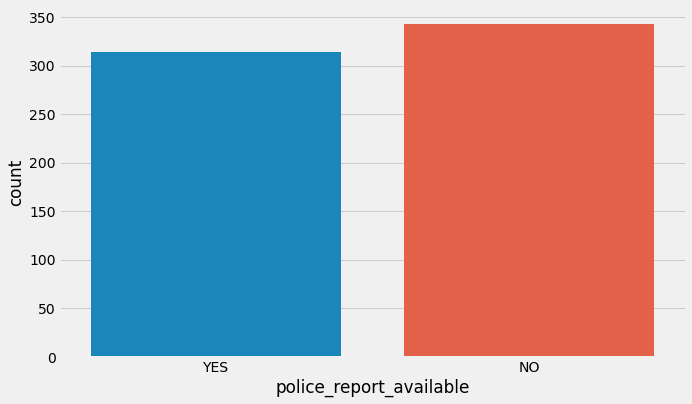

In [74]:
sns.countplot(df['police_report_available'])


C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='police_report_available', ylabel='count'>

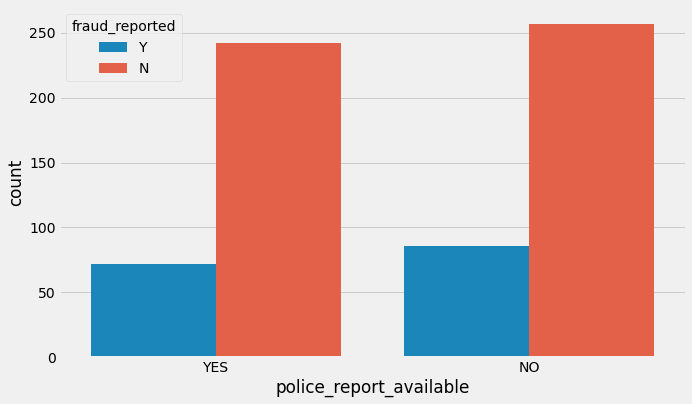

In [75]:
sns.countplot(df['police_report_available'],hue=df['fraud_reported'])


# Vehicle Detail


In [76]:
#auto_make
df['auto_make'].unique()


array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Dodge'),
  Text(2, 0, 'Suburu'),
  Text(3, 0, 'Nissan'),
  Text(4, 0, 'Chevrolet'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'BMW'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Audi'),
  Text(9, 0, 'Accura'),
  Text(10, 0, 'Volkswagen'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Mercedes'),
  Text(13, 0, 'Honda')])

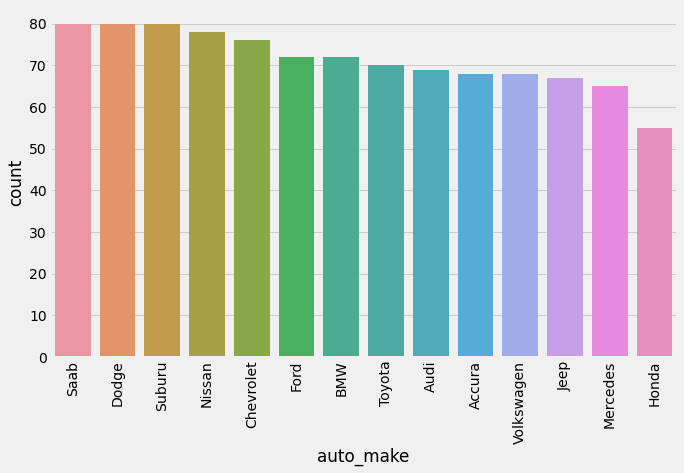

In [77]:
sns.countplot(df['auto_make'],order=df['auto_make'].value_counts().index)
plt.xticks(rotation=90)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Dodge'),
  Text(2, 0, 'Suburu'),
  Text(3, 0, 'Nissan'),
  Text(4, 0, 'Chevrolet'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'BMW'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Audi'),
  Text(9, 0, 'Accura'),
  Text(10, 0, 'Volkswagen'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Mercedes'),
  Text(13, 0, 'Honda')])

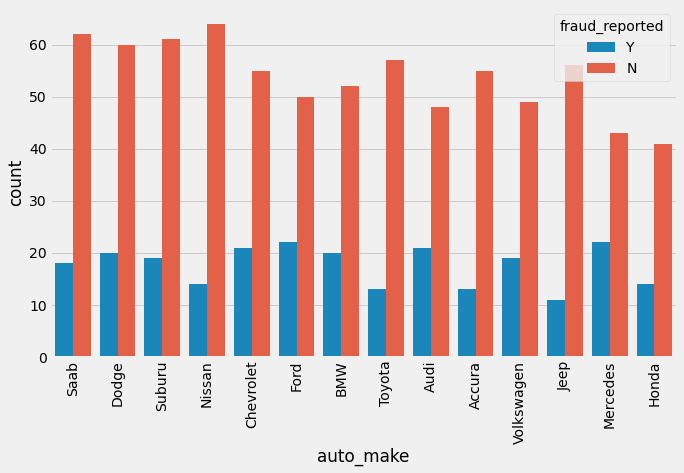

In [78]:
sns.countplot(df['auto_make'],order=df['auto_make'].value_counts().index, hue=df['fraud_reported'])
plt.xticks(rotation=90)

In [79]:
# auto_model

In [80]:
df['auto_model'].unique()


array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

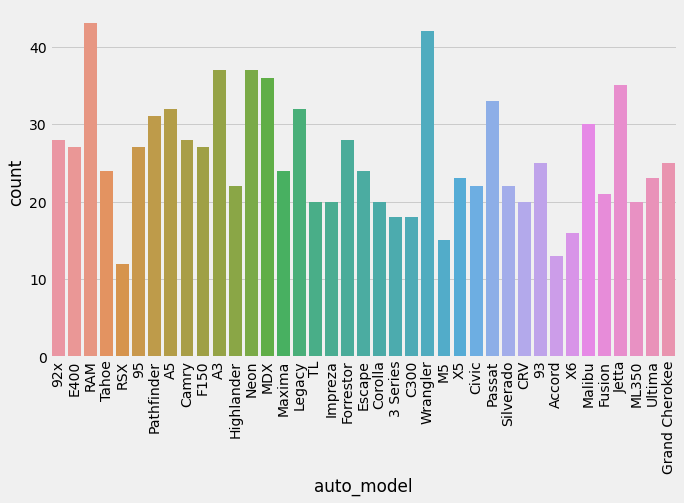

In [83]:
sns.countplot(df['auto_model'])
plt.xticks(rotation=90)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'RAM'),
  Text(1, 0, 'Wrangler'),
  Text(2, 0, 'A3'),
  Text(3, 0, 'Neon'),
  Text(4, 0, 'MDX'),
  Text(5, 0, 'Jetta'),
  Text(6, 0, 'Passat'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Legacy'),
  Text(9, 0, 'Pathfinder'),
  Text(10, 0, 'Malibu'),
  Text(11, 0, '92x'),
  Text(12, 0, 'Camry'),
  Text(13, 0, 'Forrestor'),
  Text(14, 0, 'F150'),
  Text(15, 0, '95'),
  Text(16, 0, 'E400'),
  Text(17, 0, '93'),
  Text(18, 0, 'Grand Cherokee'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Tahoe'),
  Text(21, 0, 'Maxima'),
  Text(22, 0, 'Ultima'),
  Text(23, 0, 'X5'),
  Text(24, 0, 'Highlander'),
  Text(25, 0, 'Civic'),
  Text(26, 0, 'Silverado'),
  Text(27, 0, 'Fusion'),
  Text(28, 0, 'ML350'),
  Text(29, 0, 'Impreza'),
  Text(30, 0, 'Corolla'),
  Text(31, 0, 'TL'),
  Text(32, 0, 'CRV'),
  Text(33, 0, 'C300'),
 

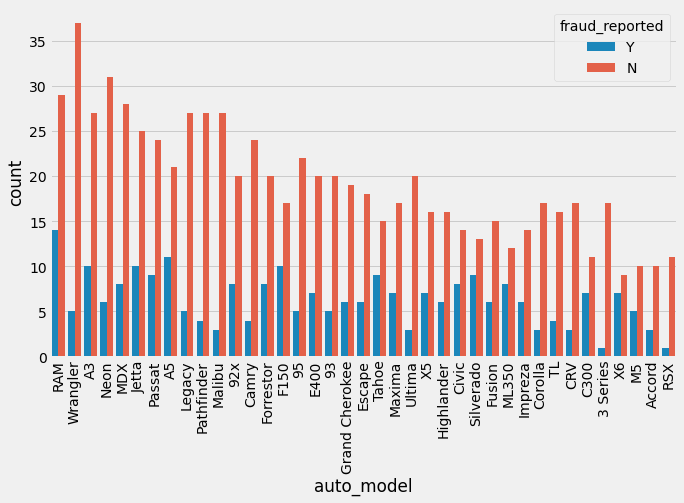

In [84]:

sns.countplot(df['auto_model'],order=df['auto_model'].value_counts().index,hue=df['fraud_reported'])
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Auto Model  vs Fraud Case')

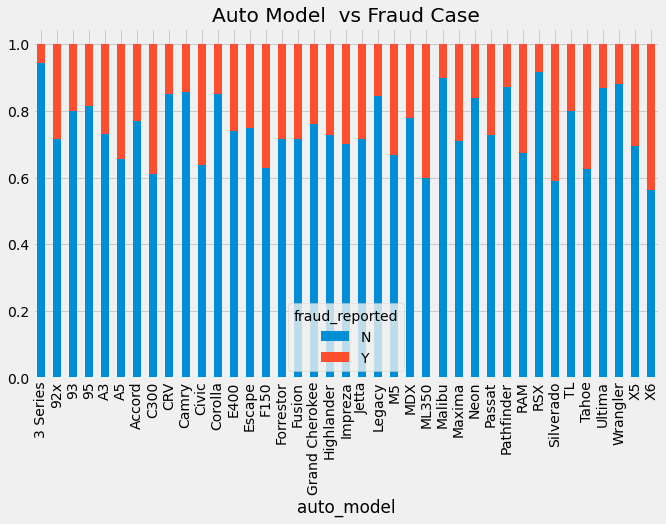

In [85]:
table=pd.crosstab(df['auto_model'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Auto Model  vs Fraud Case')

In [86]:
df['auto_year'].unique()


array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

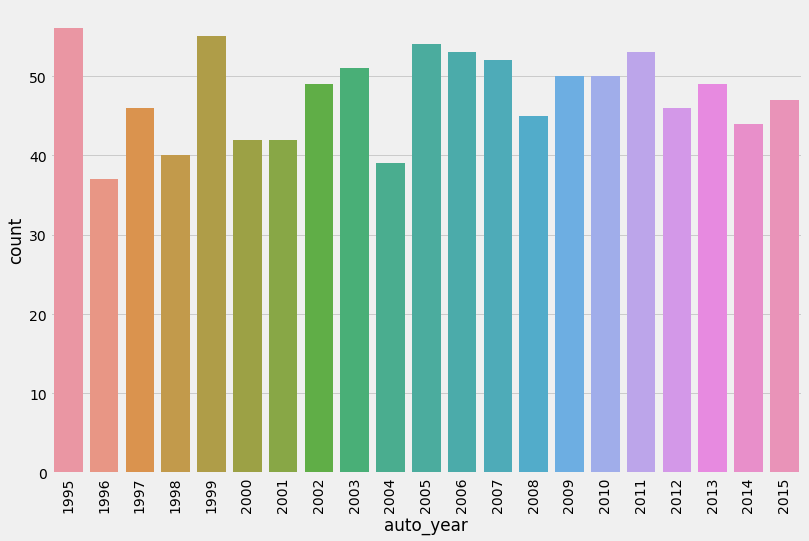

In [87]:
plt.figure(figsize=(12,8))
sns.countplot(df['auto_year'])
plt.xticks(rotation=90)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

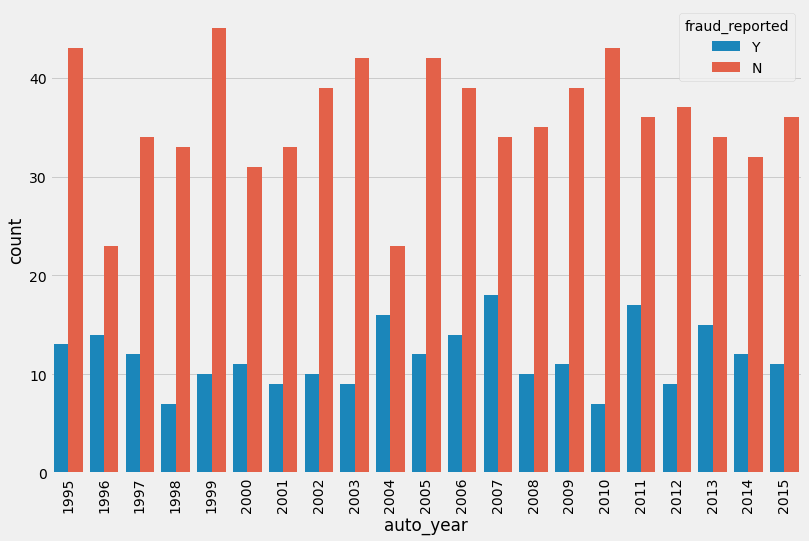

In [88]:
plt.figure(figsize=(12,8))
sns.countplot(df['auto_year'],hue=df['fraud_reported'])
plt.xticks(rotation=90)


# Insured Person Exploratory Analysis


In [91]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [92]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

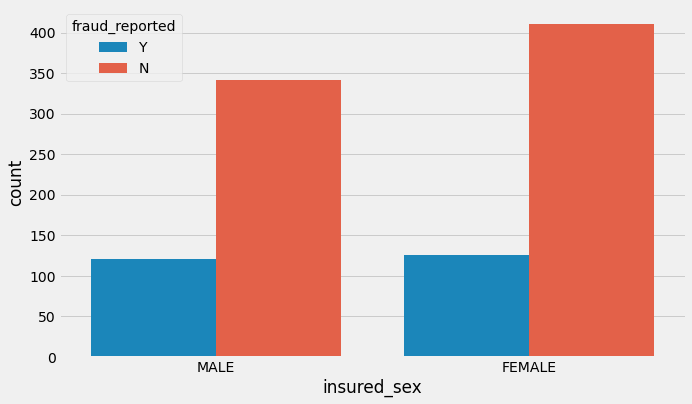

In [93]:
sns.countplot(df['insured_sex'],hue=df['fraud_reported'])

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

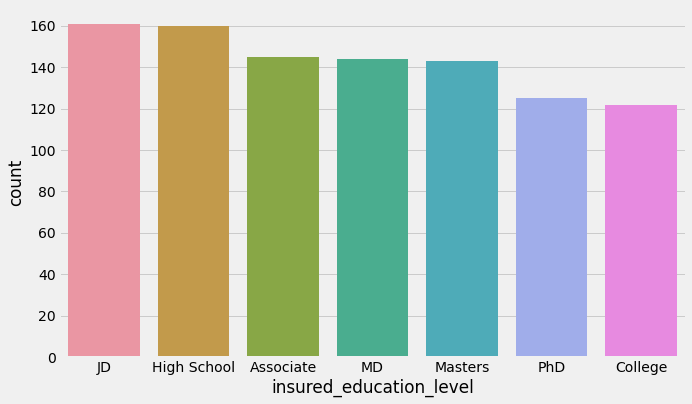

In [94]:
#insured_education_level
sns.countplot(df['insured_education_level'],order=df['insured_education_level'].value_counts().index)

<AxesSubplot:xlabel='insured_education_level'>

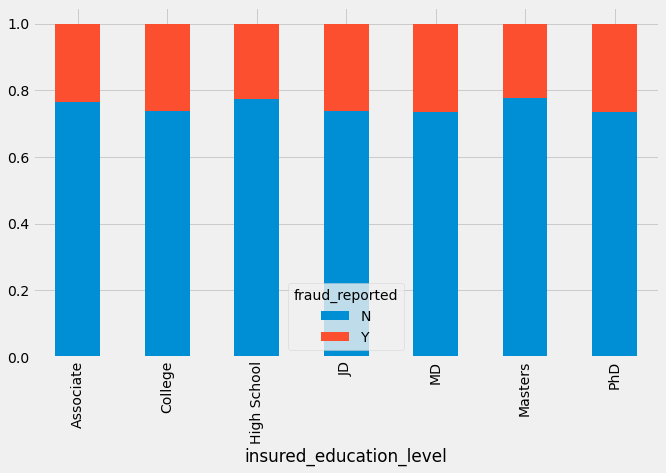

In [95]:
table=pd.crosstab(df['insured_education_level'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

In [97]:
#insured_occupation
df['insured_occupation'].unique()


array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

<AxesSubplot:xlabel='insured_occupation'>

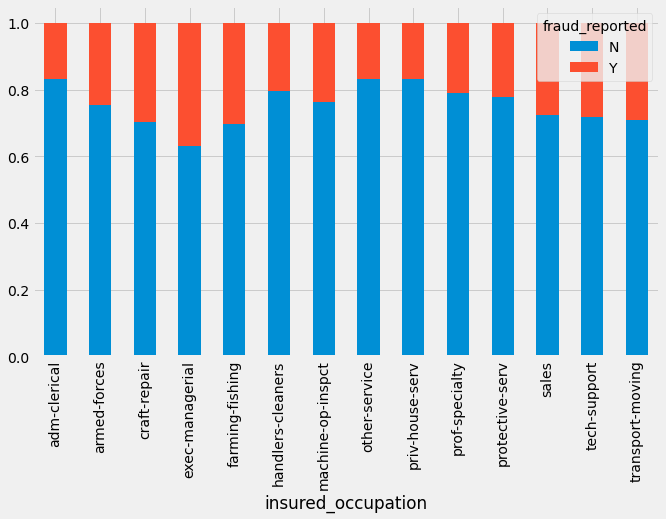

In [98]:
table=pd.crosstab(df['insured_occupation'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'reading'),
  Text(1, 0, 'exercise'),
  Text(2, 0, 'paintball'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'movies'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'kayaking'),
  Text(8, 0, 'yachting'),
  Text(9, 0, 'hiking'),
  Text(10, 0, 'video-games'),
  Text(11, 0, 'skydiving'),
  Text(12, 0, 'base-jumping'),
  Text(13, 0, 'board-games'),
  Text(14, 0, 'polo'),
  Text(15, 0, 'chess'),
  Text(16, 0, 'dancing'),
  Text(17, 0, 'sleeping'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'basketball')])

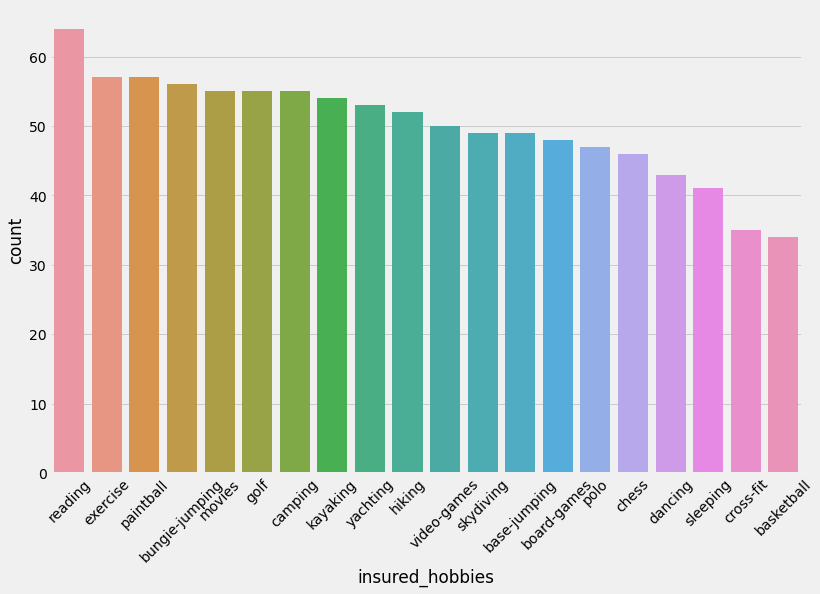

In [99]:
#insured_hobbies
plt.figure(figsize=(12,8))
sns.countplot(df['insured_hobbies'],order=df['insured_hobbies'].value_counts().index)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='insured_hobbies'>

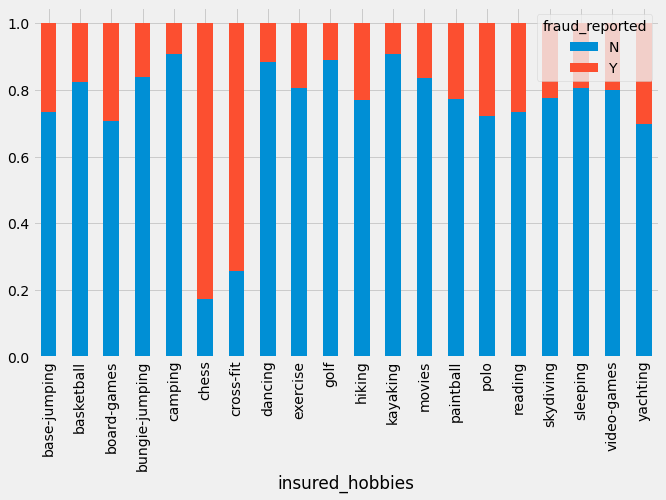

In [100]:
table=pd.crosstab(df['insured_hobbies'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

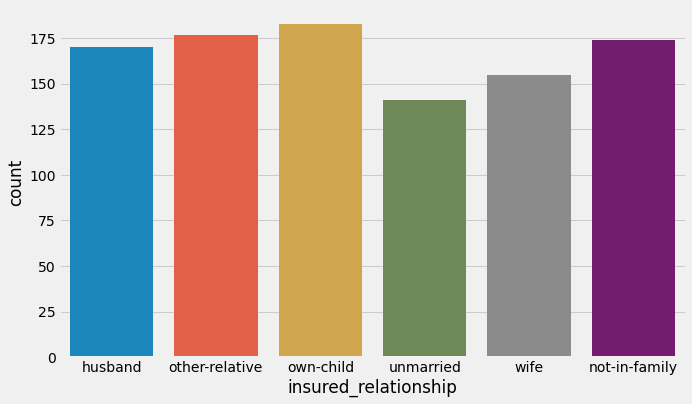

In [101]:
#insured_relationship
sns.countplot(df['insured_relationship'])


C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

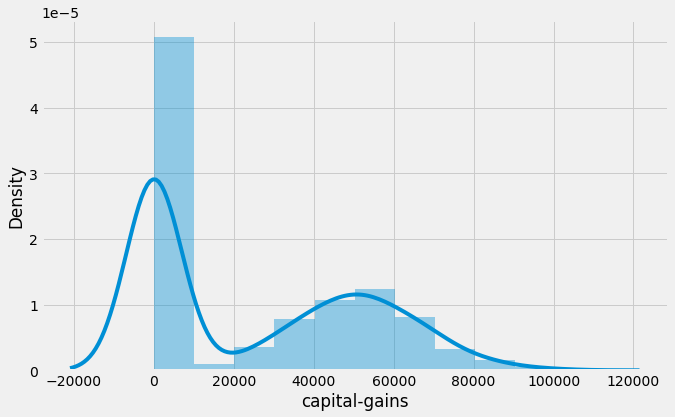

In [102]:
sns.distplot(df['capital-gains'])

In [103]:
df[cont_features]

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

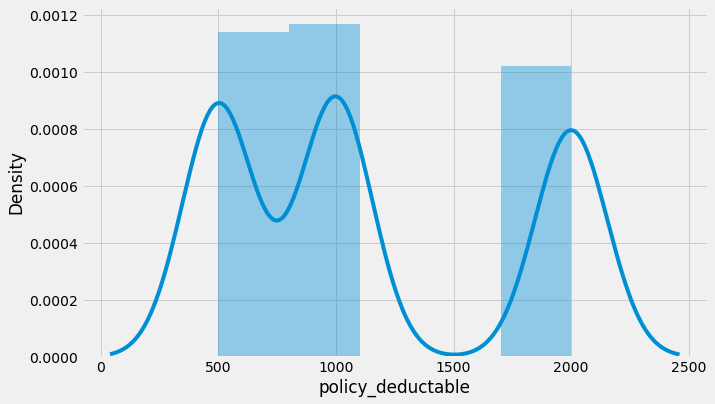

In [104]:
sns.distplot(df['policy_deductable'])


C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

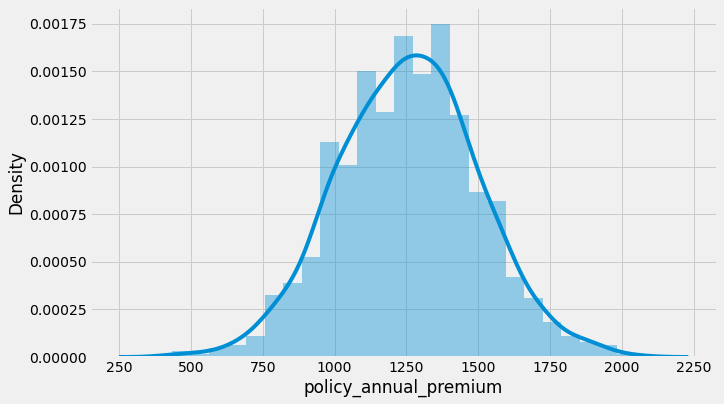

In [105]:
sns.distplot(df['policy_annual_premium'])


C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '-1000000'),
  Text(1, 0, '0'),
  Text(2, 0, '2000000'),
  Text(3, 0, '3000000'),
  Text(4, 0, '4000000'),
  Text(5, 0, '5000000'),
  Text(6, 0, '6000000'),
  Text(7, 0, '7000000'),
  Text(8, 0, '8000000'),
  Text(9, 0, '9000000'),
  Text(10, 0, '10000000')])

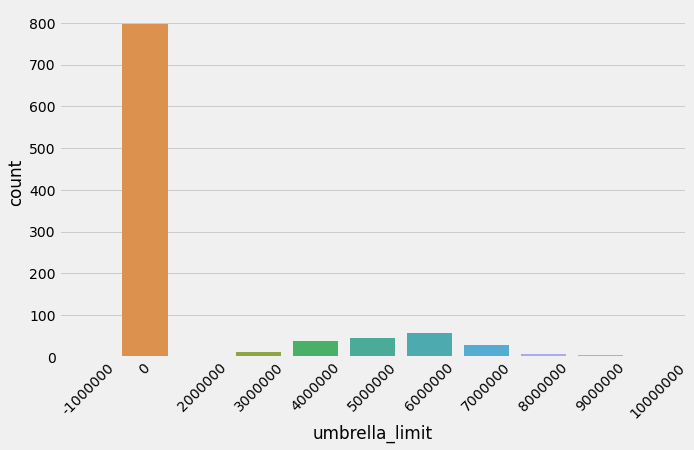

In [106]:
sns.countplot(df['umbrella_limit'])
plt.xticks(rotation=45)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

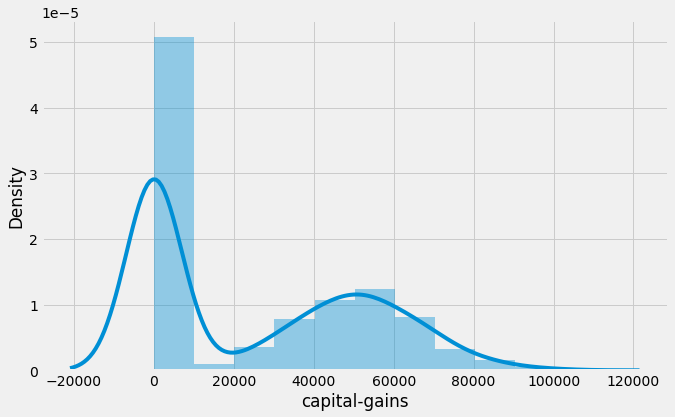

In [107]:
sns.distplot(df['capital-gains'])


C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

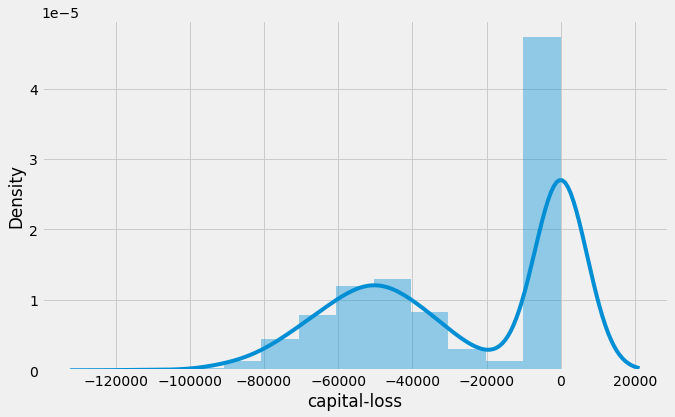

In [108]:
sns.distplot(df['capital-loss'])


In [114]:
df[cont_features]


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


In [115]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [116]:
df[['incident_type','collision_type']]

,incident_type,collision_type
0,Single Vehicle Collision,Side Collision
1,Vehicle Theft,NaN
2,Multi-vehicle Collision,Rear Collision
3,Single Vehicle Collision,Front Collision
4,Vehicle Theft,NaN
...,...,...
995,Single Vehicle Collision,Front Collision
996,Single Vehicle Collision,Rear Collision
997,Multi-vehicle Collision,Side Collision
998,Single Vehicle Collision,Rear Collision


In [117]:
df[df['collision_type'].isnull()][['incident_type','collision_type']]

,incident_type,collision_type
1,Vehicle Theft,NaN
4,Vehicle Theft,NaN
13,Parked Car,NaN
26,Parked Car,NaN
27,Vehicle Theft,NaN
...,...,...
964,Vehicle Theft,NaN
969,Vehicle Theft,NaN
983,Parked Car,NaN
994,Parked Car,NaN


In [119]:
df[df['collision_type'].isnull()]['incident_type'].unique()

array(['Vehicle Theft', 'Parked Car'], dtype=object)

In [120]:
df[df['incident_type']=='Parked Car']


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
13,121,34,626808,26-10-2012,OH,100/300,1000,936.61,0,464652,...,1,NO,7280,1120,1120,5040,Toyota,Highlander,2010,N
26,257,43,863236,20-09-1990,IN,100/300,2000,1322.10,0,436984,...,3,YES,9020,1640,820,6560,Toyota,Camry,2005,N
37,289,49,933293,03-02-1993,IL,500/1000,2000,1222.48,0,620757,...,1,YES,5330,1230,820,3280,Suburu,Legacy,2001,N
54,195,39,282195,17-08-2014,OH,250/500,1000,1393.57,0,478423,...,1,YES,2640,480,480,1680,Ford,F150,2009,N
57,94,32,307195,18-10-1995,IN,500/1000,1000,1414.74,0,464691,...,3,NO,2400,300,300,1800,Chevrolet,Silverado,2014,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,108,31,148498,04-01-2002,IN,250/500,2000,1112.04,6000000,472209,...,3,NO,4290,780,780,2730,Volkswagen,Passat,1998,N
950,101,27,557218,23-11-1997,IL,500/1000,500,982.70,6000000,440865,...,0,NO,5170,940,470,3760,Toyota,Camry,2001,N
983,17,39,774895,28-10-2006,IL,250/500,1000,840.95,0,431202,...,1,NaN,3440,430,430,2580,Suburu,Legacy,2002,N
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N


In [121]:
df[df['incident_type']=='Vehicle Theft']


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
27,202,34,608513,18-07-2002,IN,100/300,500,848.07,3000000,607730,...,1,NaN,5720,1040,520,4160,Suburu,Forrestor,2003,Y
48,175,34,866931,07-01-2008,IN,500/1000,1000,1123.87,8000000,446326,...,0,YES,7290,810,810,5670,Volkswagen,Passat,1995,N
51,91,27,537546,20-08-1994,IL,100/300,2000,1073.83,0,609930,...,2,NaN,7260,1320,660,5280,BMW,M5,2008,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,137,35,645723,05-05-1991,OH,500/1000,500,1107.07,0,478868,...,0,YES,3300,600,600,2100,Saab,92x,2008,N
961,128,35,437960,03-04-2001,IN,250/500,1000,1074.99,0,453620,...,0,NaN,7590,1380,690,5520,Accura,MDX,2012,N
963,104,30,544225,03-08-2010,OH,100/300,500,1052.85,0,607697,...,0,YES,4800,960,480,3360,BMW,3 Series,2006,N
964,163,37,390256,25-11-2009,IN,500/1000,1000,1200.33,4000000,477631,...,1,YES,3900,390,780,2730,Volkswagen,Jetta,2008,Y


In [122]:
df[df['property_damage'].isnull()]


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,NaN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
16,70,26,558938,08-06-2005,OH,500/1000,1000,1199.44,5000000,619884,...,2,YES,52110,5790,5790,40530,Nissan,Maxima,2012,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,1,NaN,60200,6020,6020,48160,Volkswagen,Passat,2012,N
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [123]:
df['property_damage'].unique()


array(['YES', nan, 'NO'], dtype=object)

In [124]:
df[df['police_report_available'].isnull()]


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,NaN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,NaN,42300,4700,4700,32900,Saab,92x,1996,N
10,235,42,543610,26-05-2002,OH,100/300,500,1253.12,4000000,462283,...,2,NaN,87010,7910,15820,63280,Ford,F150,2002,N
20,460,62,183430,25-06-2002,IN,250/500,1000,1187.96,4000000,618845,...,0,NaN,47160,0,5240,41920,Suburu,Impreza,2011,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,22,21,550127,04-07-2007,IN,250/500,1000,1248.05,0,443550,...,2,NaN,53280,5920,0,47360,Chevrolet,Malibu,2015,N
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,1,NaN,60200,6020,6020,48160,Volkswagen,Passat,2012,N
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N


In [125]:
Missing_coulmn=[]
for i in df.columns:
    if df[i].isnull().sum() !=0:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [128]:
 df.isnull().sum()


months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# LabelEncoder

In [129]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Target']=le.fit_transform(df['fraud_reported'])

# Correlation


<AxesSubplot:>

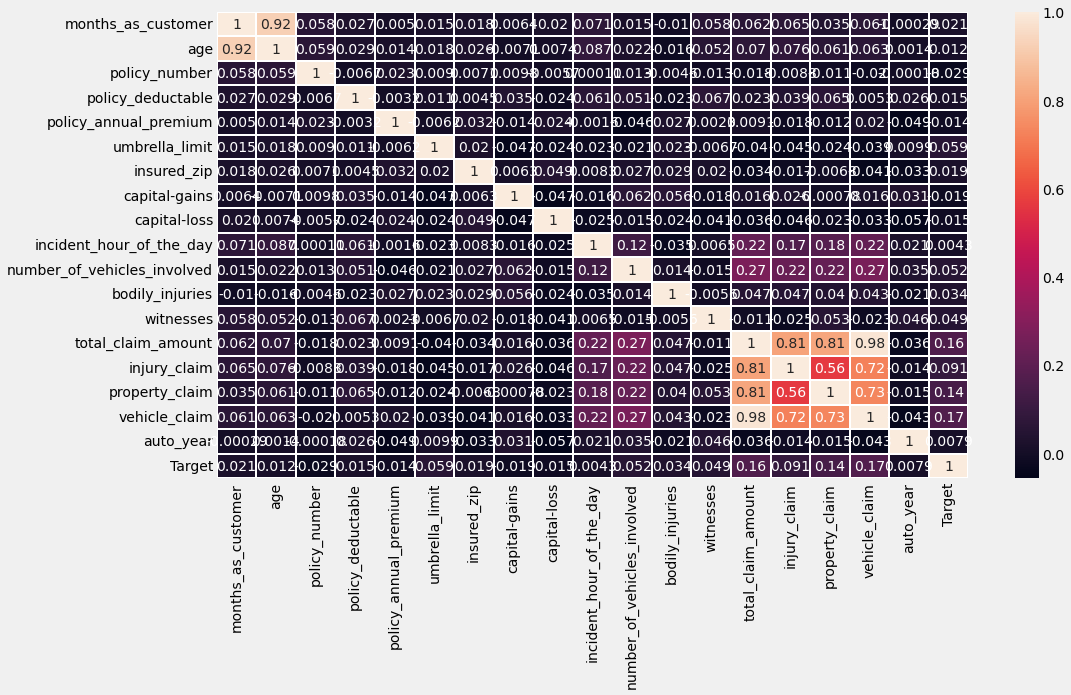

In [130]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

<AxesSubplot:xlabel='policy_csl'>

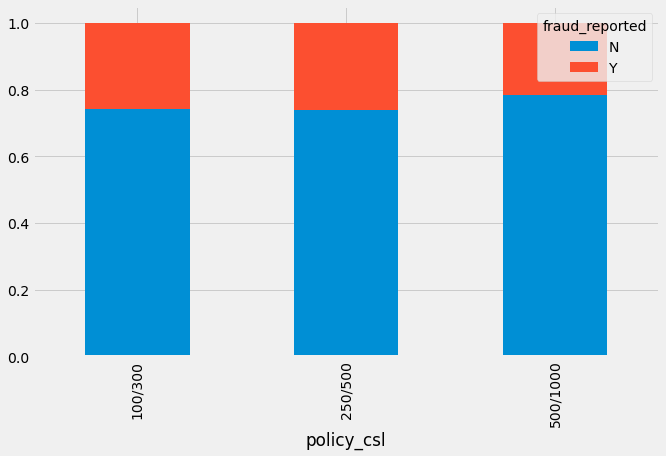

In [132]:
table=pd.crosstab(df['policy_csl'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

In [134]:
df['Vehicle_Age']= 2015-df['auto_year']

df['Vehicle_Age']

0      11
1       8
2       8
3       1
4       6
       ..
995     9
996     0
997    19
998    17
999     8
Name: Vehicle_Age, Length: 1000, dtype: int64

In [135]:
df['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

In [136]:
# dropping unimportant columns

df = df.drop(columns = ['policy_number', 'policy_csl','insured_zip','policy_bind_date', 'incident_date', 'incident_location',
                        'auto_year'])

df.head(2)

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Target,Vehicle_Age
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,YES,71610,6510,13020,52080,Saab,92x,Y,1,11
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,NO,5070,780,780,3510,Mercedes,E400,Y,1,8


In [137]:
# Target Variable:

df[['fraud_reported','Target']]
    

,fraud_reported,Target
0,Y,1
1,Y,1
2,N,0
3,Y,1
4,N,0
...,...,...
995,N,0
996,N,0
997,N,0
998,N,0


In [138]:
df['incident_hour_of_the_day']

0       5
1       8
2       7
3       5
4      20
       ..
995    20
996    23
997     4
998     2
999     6
Name: incident_hour_of_the_day, Length: 1000, dtype: int64

In [139]:
# This should be trated like categorical column

df['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

In [140]:
bins=[-1,5,11,16,20,24]
name=['night','Morning','afternoon','evening','midnight']
df['incident_period_of_the_day']= pd.cut(df['incident_hour_of_the_day'],bins,labels=name)

In [141]:
df[['incident_hour_of_the_day','incident_period_of_the_day']]

,incident_hour_of_the_day,incident_period_of_the_day
0,5,night
1,8,Morning
2,7,Morning
3,5,night
4,20,evening
...,...,...
995,20,evening
996,23,midnight
997,4,night
998,2,night


In [142]:
df=df.drop('incident_hour_of_the_day',axis=1)

In [143]:
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Target,Vehicle_Age,incident_period_of_the_day
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,71610,6510,13020,52080,Saab,92x,Y,1,11,night
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,5070,780,780,3510,Mercedes,E400,Y,1,8,Morning
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,34650,7700,3850,23100,Dodge,RAM,N,0,8,Morning
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,63400,6340,6340,50720,Chevrolet,Tahoe,Y,1,1,night
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,6500,1300,650,4550,Accura,RSX,N,0,6,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,...,87200,17440,8720,61040,Honda,Accord,N,0,9,evening
996,285,41,IL,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,...,108480,18080,18080,72320,Volkswagen,Passat,N,0,0,midnight
997,130,34,OH,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,...,67500,7500,7500,52500,Suburu,Impreza,N,0,19,night
998,458,62,IL,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,...,46980,5220,5220,36540,Audi,A5,N,0,17,night


In [144]:
df=df.drop('fraud_reported', axis=1)

In [145]:
df.shape

(1000, 33)

<AxesSubplot:>

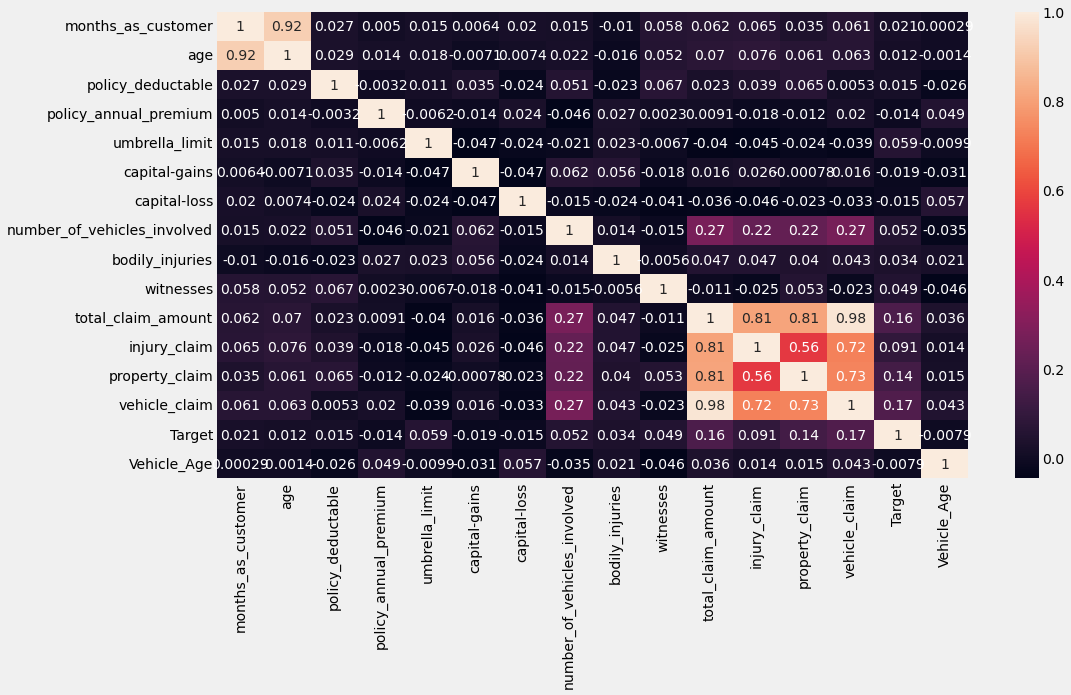

In [146]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [147]:
df['incident_period_of_the_day']=df['incident_period_of_the_day'].astype(object)
df['umbrella_limit']=df['umbrella_limit'].astype(object)

# Seprate Independent and Independent Variables

In [148]:
X=df.drop('Target',axis=1)
Y=df['Target']

In [150]:
X.shape

(1000, 32)

In [151]:
Y.shape

(1000,)

In [152]:
catg_features=[col for col in X.columns if X[col].dtypes=='object']
cont_features=[col for col in X.columns if X[col].dtypes!='object']

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


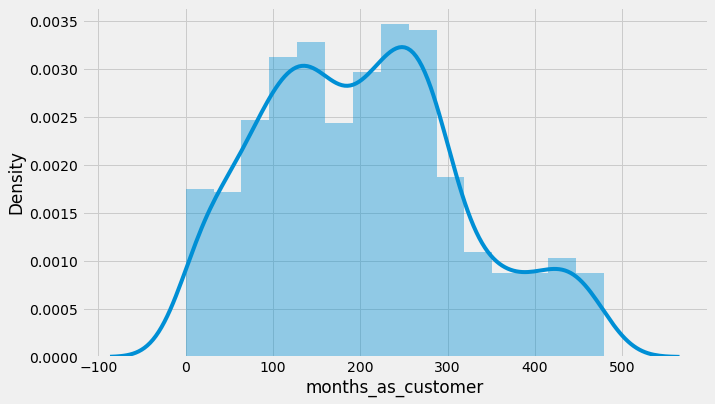

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


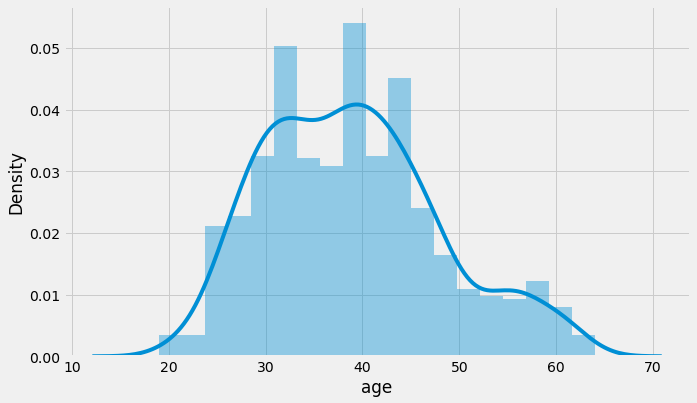

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


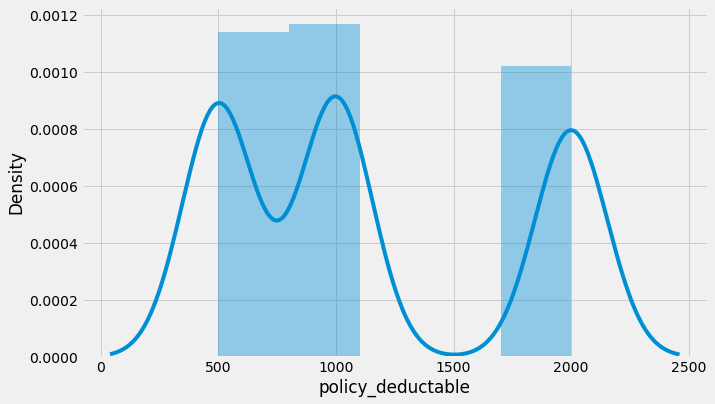

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


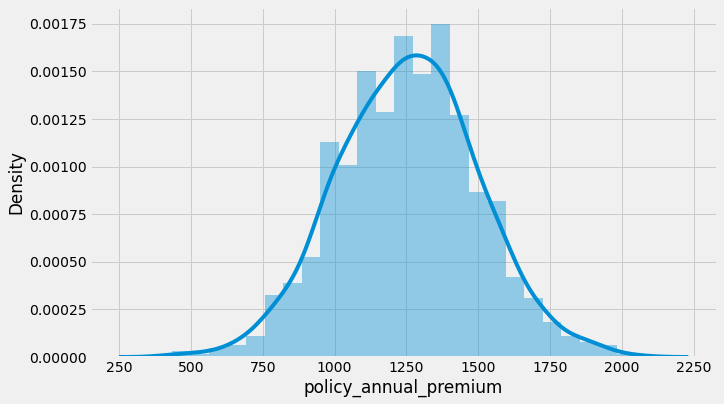

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


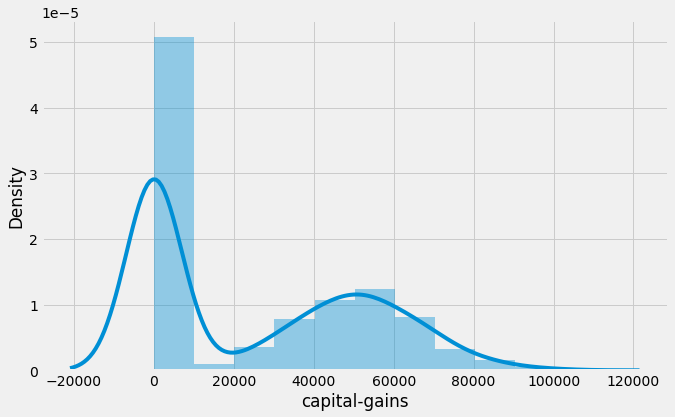

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


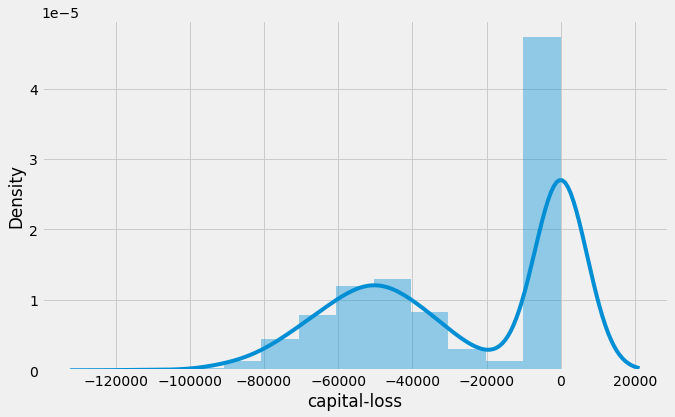

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


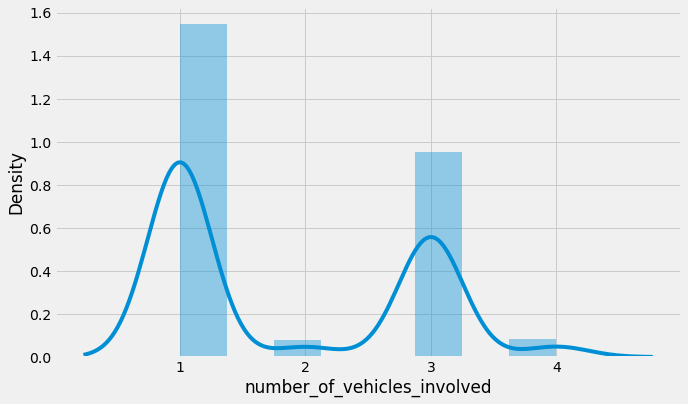

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


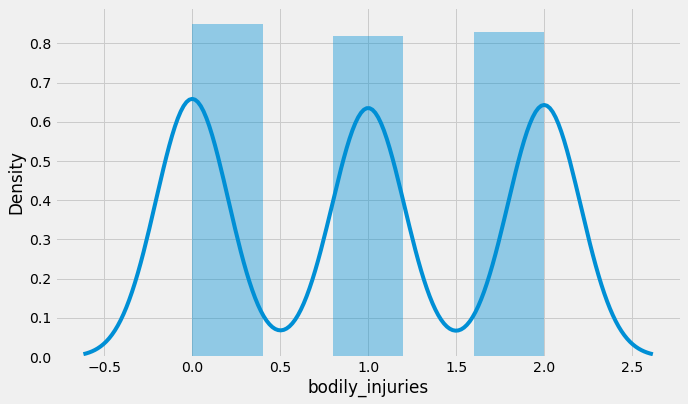

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


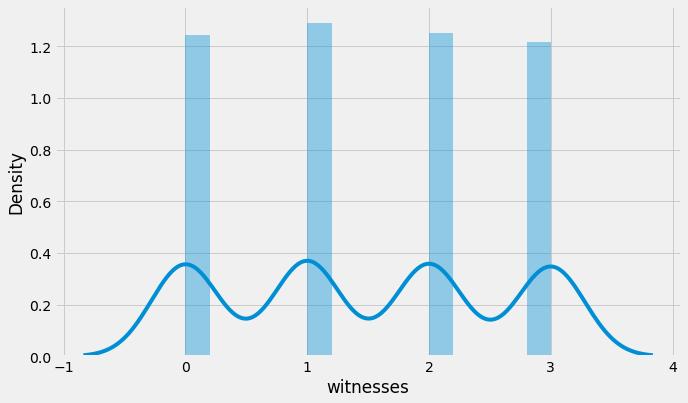

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


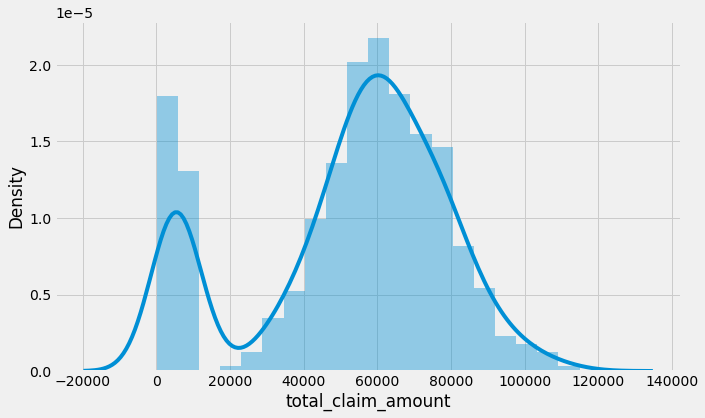

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


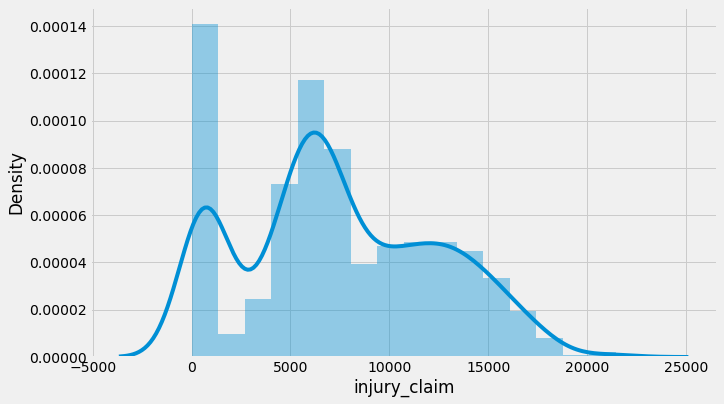

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


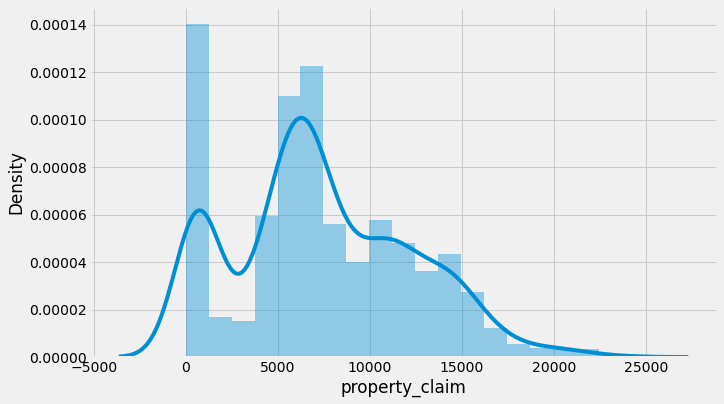

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


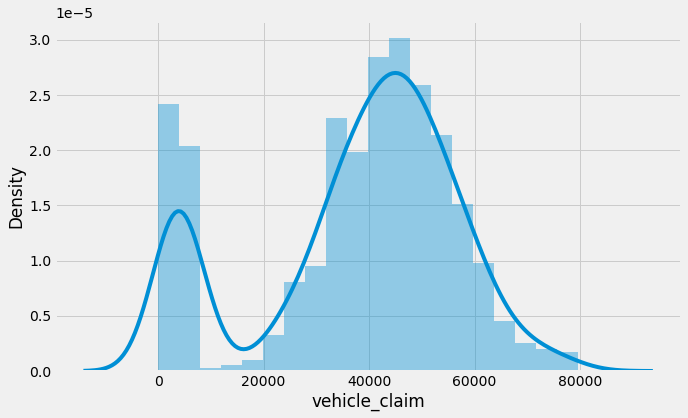

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


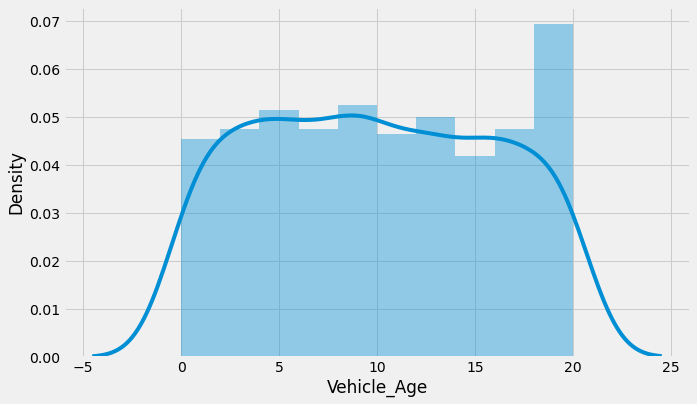

In [153]:
#Continuous Fetaures
for i in cont_features:
    sns.distplot(X[i])
    plt.show()

# checking outliers

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


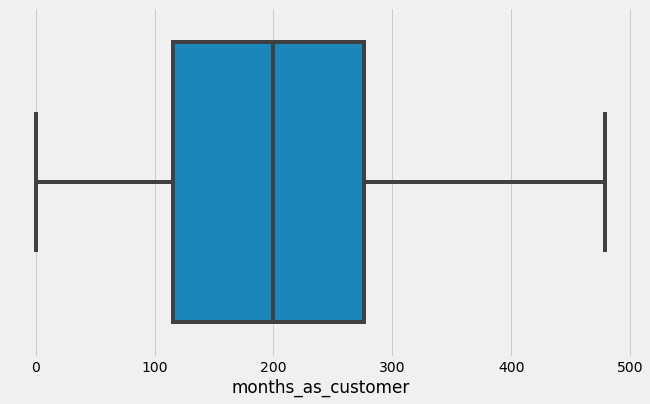

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


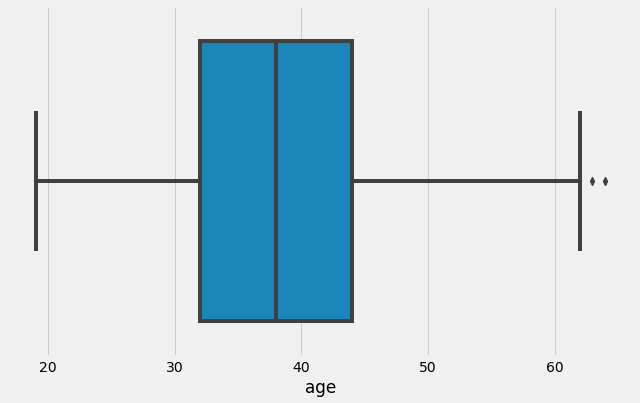

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


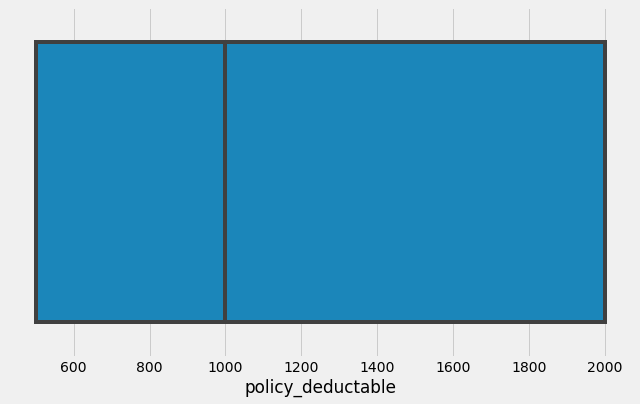

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


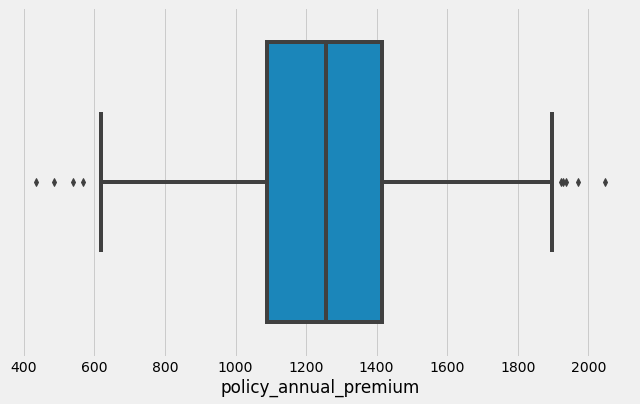

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


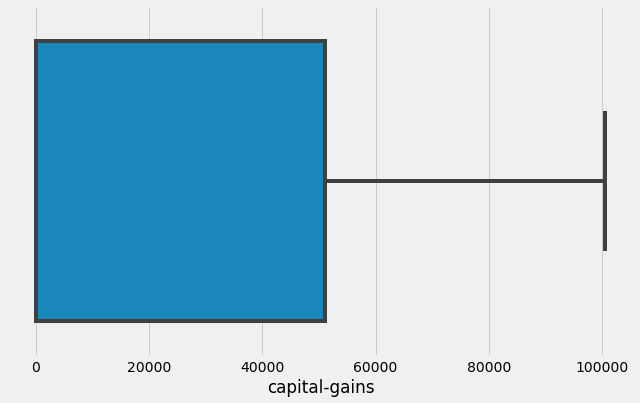

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


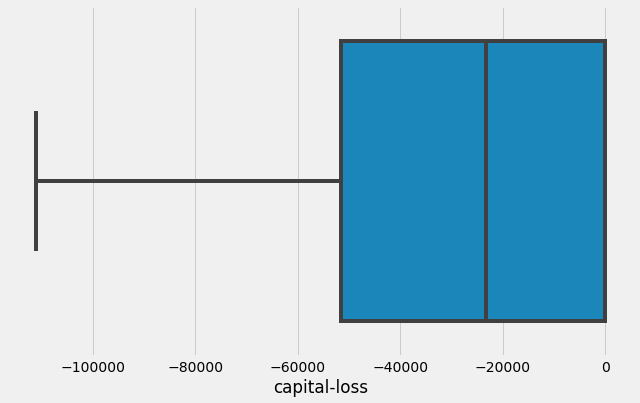

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


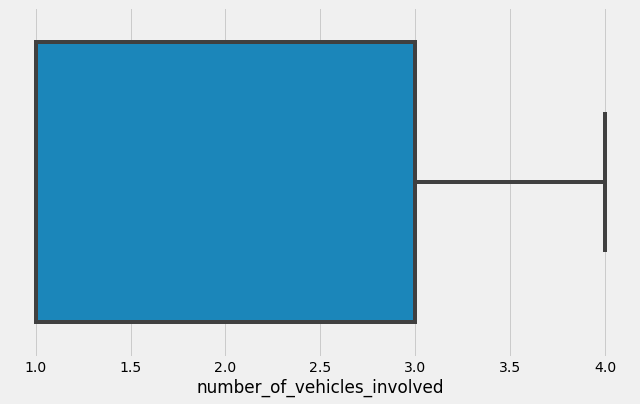

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


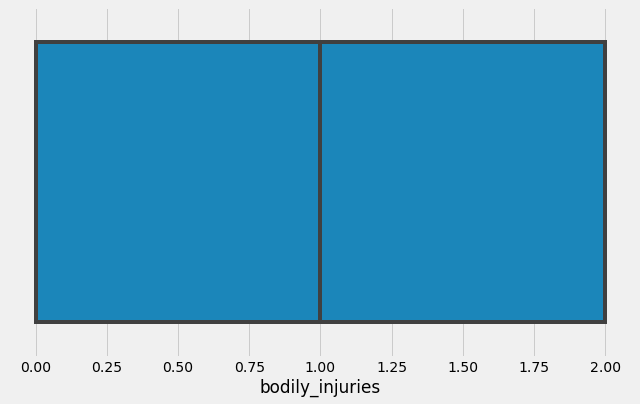

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


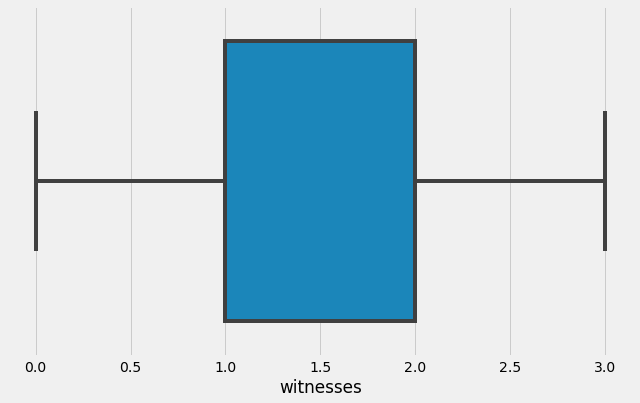

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


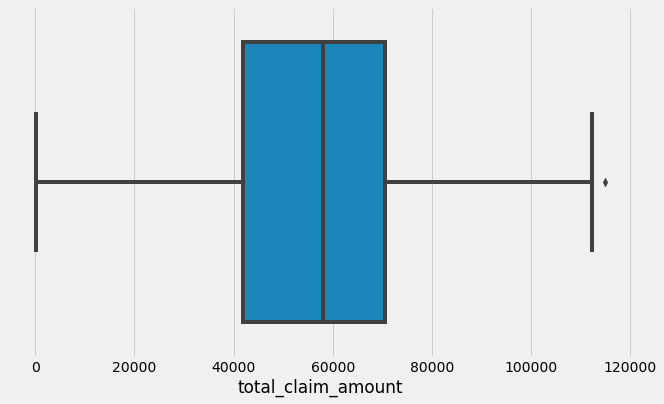

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


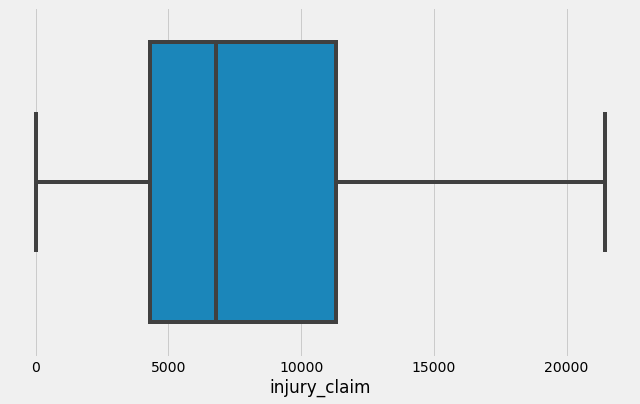

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


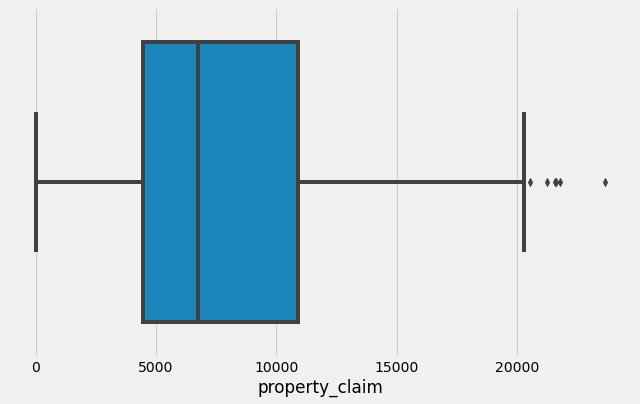

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


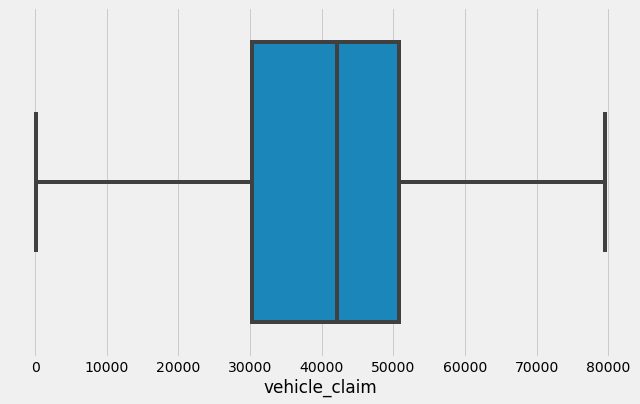

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


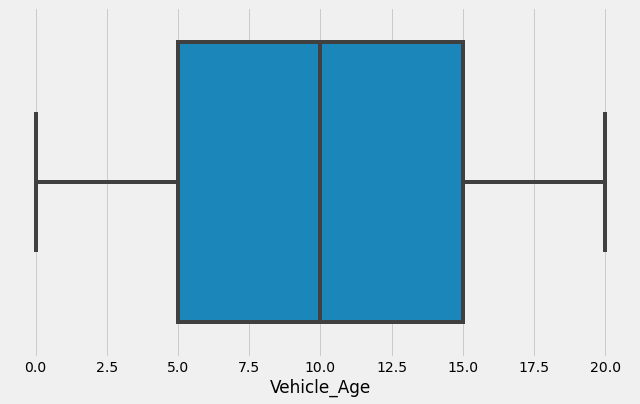

In [154]:
for i in cont_features:
    sns.boxplot(X[i])
    plt.show()
    

# checking skewness

In [155]:
X[cont_features].skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
capital-gains                  0.478850
capital-loss                  -0.391472
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
Vehicle_Age                    0.048289
dtype: float64

In [156]:
missing_column=['age','policy_annual_premium','total_claim_amount','property_claim']

In [157]:
for i in missing_column:
    IQR= X[i].quantile(.75)-X[i].quantile(.25)
    lower=X[i].quantile(.25) - (1.5 * IQR)
    upper=X[i].quantile(.75) + (1.5 * IQR)
    X[i]=np.where(X[i]<lower,lower,X[i])
    X[i]=np.where(X[i]>upper,upper,X[i])

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


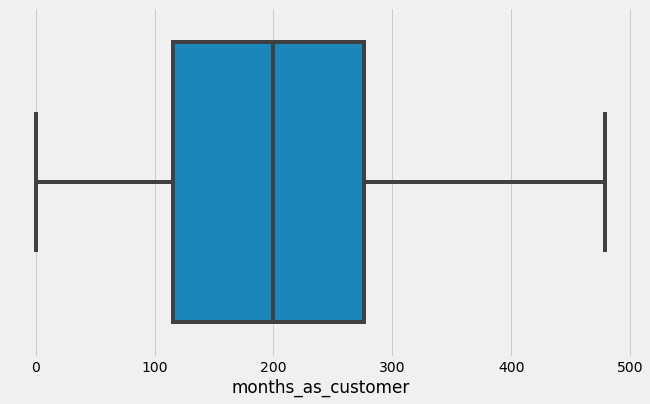

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


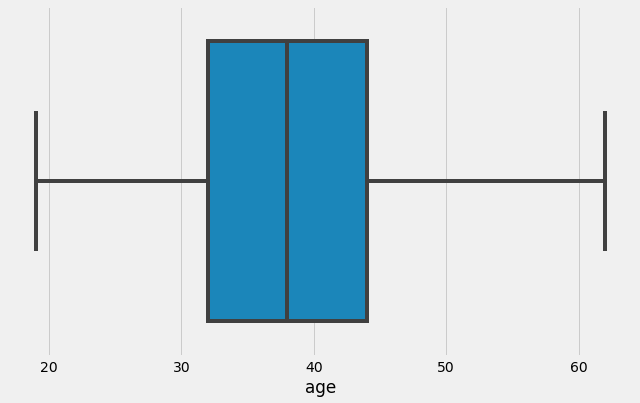

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


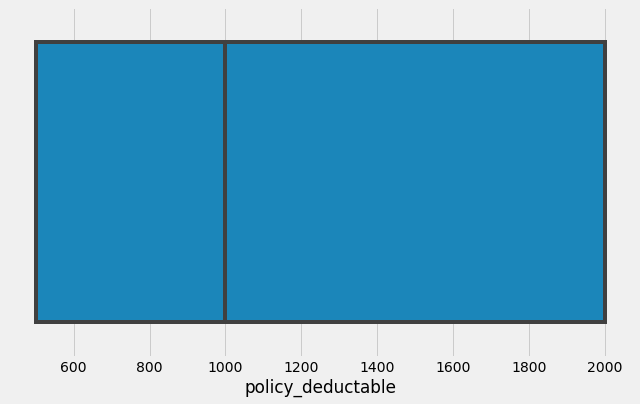

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


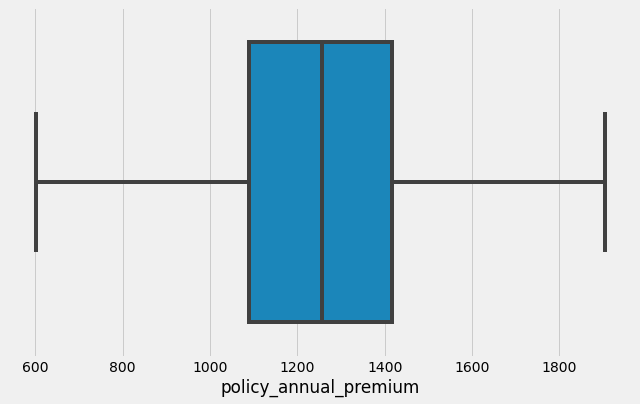

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


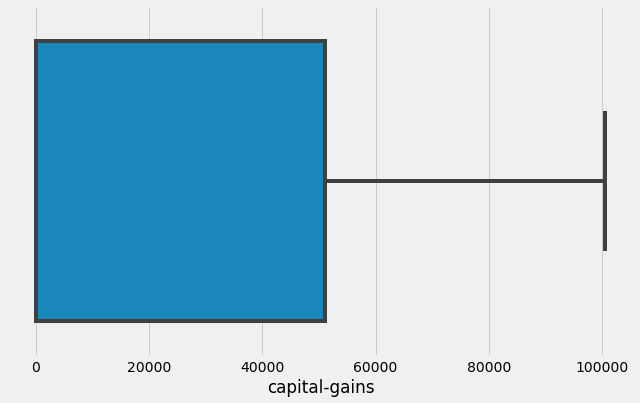

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


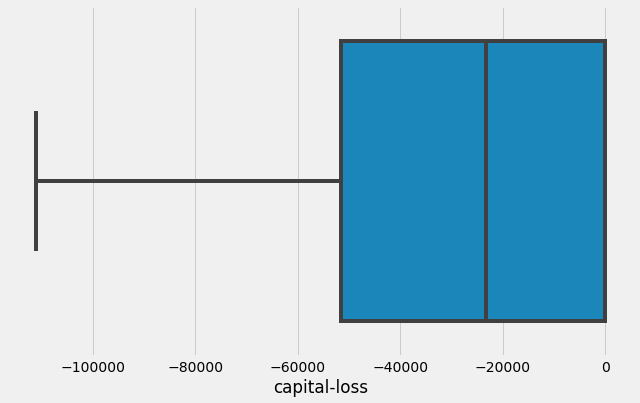

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


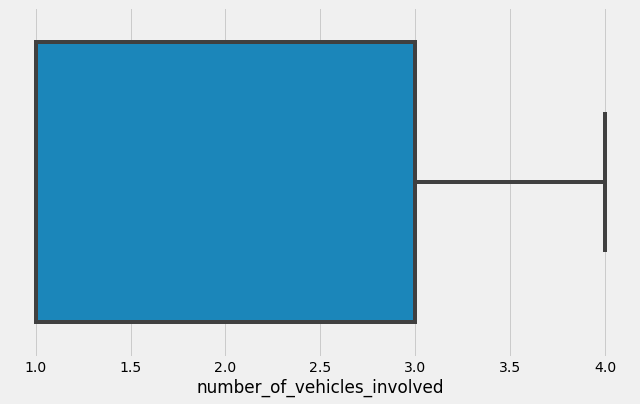

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


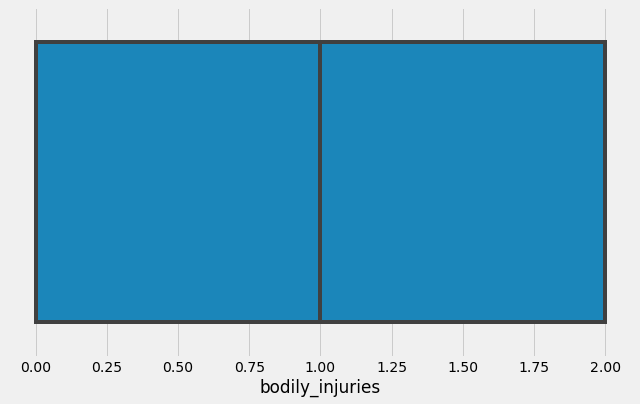

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


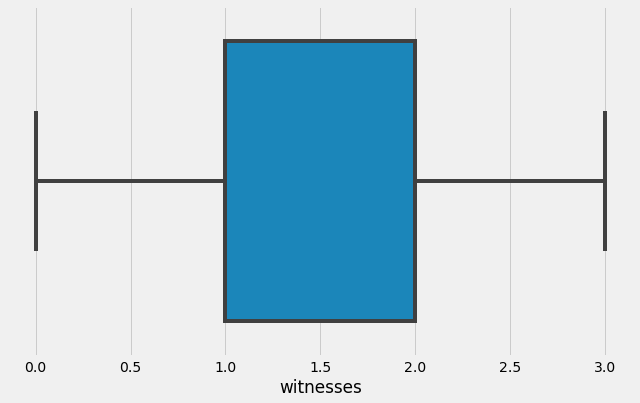

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


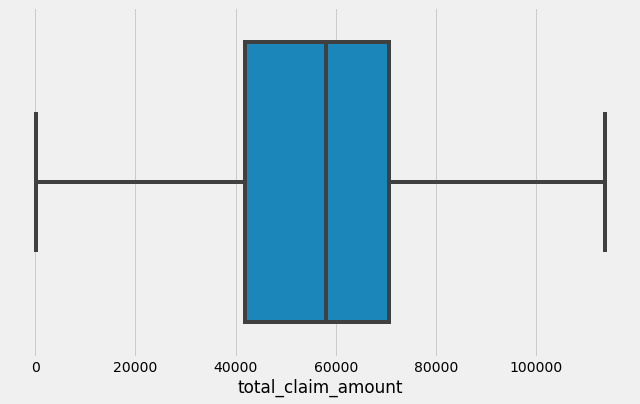

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


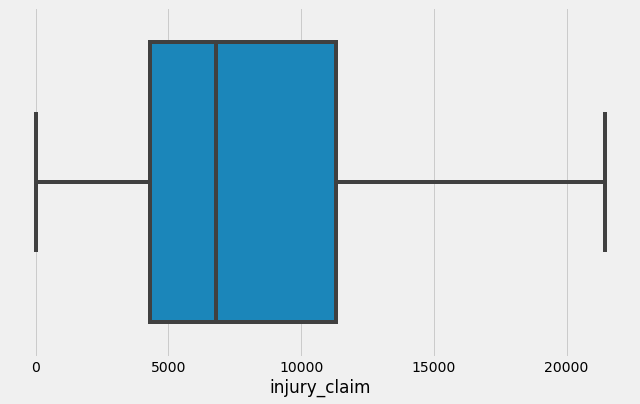

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


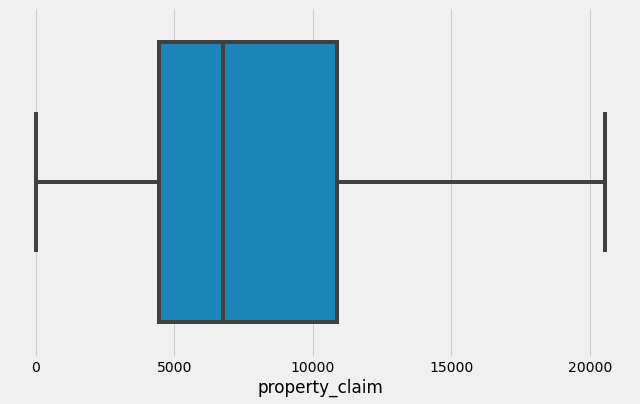

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


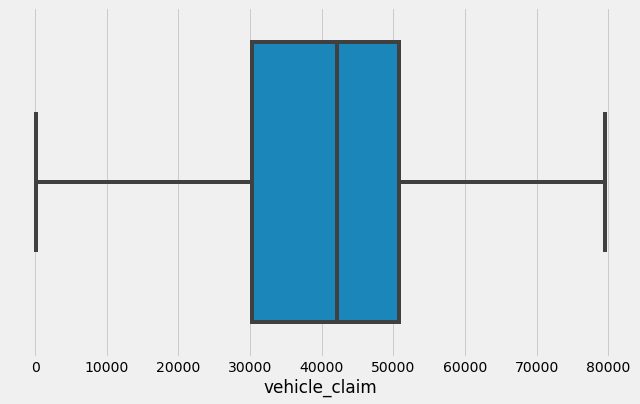

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


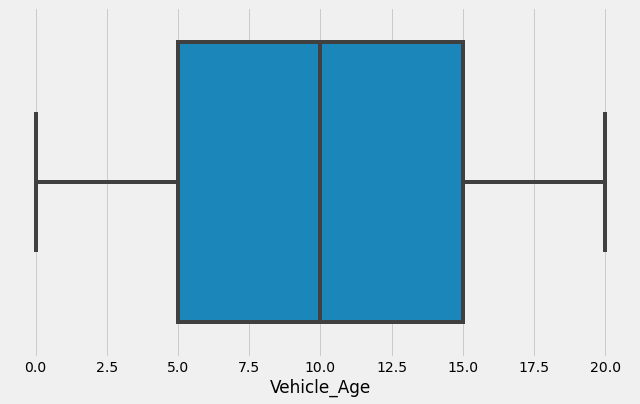

In [158]:
for i in cont_features:
    sns.boxplot(X[i])
    plt.show()

# Feature Selection


# StandardScaler

In [159]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(X[cont_features])

# VIF


In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [161]:
VIF= pd.DataFrame()
VIF['features']=X[cont_features].columns

In [162]:
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(cont_features))]

In [163]:
VIF

,features,vif
0,months_as_customer,6.815060
1,age,6.788114
2,policy_deductable,1.020949
3,policy_annual_premium,1.013444
4,capital-gains,1.014914
5,capital-loss,1.012754
6,number_of_vehicles_involved,1.095850
7,bodily_injuries,1.011043
8,witnesses,1.023162
9,total_claim_amount,47858.381223


In [164]:
# However Total claim is the total of injury_claim + property_claim + vehicle_claim
# Delete total_claim_amount
X.drop('total_claim_amount',axis=1,inplace=True)

In [165]:
catg_features=[col for col in X.columns if X[col].dtypes=='object']
cont_features=[col for col in X.columns if X[col].dtypes!='object']

In [166]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(X[cont_features])

VIF= pd.DataFrame()
VIF['features']=X[cont_features].columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(cont_features))]
VIF

,features,vif
0,months_as_customer,6.772147
1,age,6.774011
2,policy_deductable,1.019308
3,policy_annual_premium,1.010403
4,capital-gains,1.013336
5,capital-loss,1.012154
6,number_of_vehicles_involved,1.092676
7,bodily_injuries,1.008444
8,witnesses,1.023126
9,injury_claim,2.128118


In [167]:
X.drop('age',axis=1,inplace=True)

In [168]:
catg_features=[col for col in X.columns if X[col].dtypes=='object']
cont_features=[col for col in X.columns if X[col].dtypes!='object']

In [169]:
sc= StandardScaler()
scaled= sc.fit_transform(X[cont_features])

VIF= pd.DataFrame()
VIF['features']=X[cont_features].columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(cont_features))]
VIF

,features,vif
0,months_as_customer,1.010202
1,policy_deductable,1.019296
2,policy_annual_premium,1.009315
3,capital-gains,1.012127
4,capital-loss,1.011092
5,number_of_vehicles_involved,1.092361
6,bodily_injuries,1.008084
7,witnesses,1.022882
8,injury_claim,2.125611
9,property_claim,2.225209


# checking skewness again

In [170]:
X[cont_features].skew()

months_as_customer             0.362177
policy_deductable              0.477887
policy_annual_premium          0.016003
capital-gains                  0.478850
capital-loss                  -0.391472
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
injury_claim                   0.264811
property_claim                 0.348531
vehicle_claim                 -0.621098
Vehicle_Age                    0.048289
dtype: float64

In [171]:
X.head(10)

,months_as_customer,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,Vehicle_Age,incident_period_of_the_day
0,328,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,...,1,2,YES,6510,13020.0,52080,Saab,92x,11,night
1,228,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,...,0,0,NO,780,780.0,3510,Mercedes,E400,8,Morning
2,134,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,...,2,3,NO,7700,3850.0,23100,Dodge,RAM,8,Morning
3,256,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,...,1,2,NO,6340,6340.0,50720,Chevrolet,Tahoe,1,night
4,228,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,...,0,1,NO,1300,650.0,4550,Accura,RSX,6,evening
5,256,OH,1000,1351.10,0,FEMALE,PhD,tech-support,bungie-jumping,unmarried,...,0,2,NO,6410,6410.0,51280,Saab,95,12,evening
6,137,IN,1000,1333.35,0,MALE,PhD,prof-specialty,board-games,husband,...,0,0,NO,21450,7150.0,50050,Nissan,Pathfinder,3,night
7,165,IL,1000,1137.03,0,MALE,Associate,tech-support,base-jumping,unmarried,...,2,2,YES,9380,9380.0,32830,Audi,A5,0,midnight
8,27,IL,500,1442.99,0,FEMALE,PhD,other-service,golf,own-child,...,1,1,YES,2770,2770.0,22160,Toyota,Camry,3,midnight
9,212,IL,500,1315.68,0,MALE,PhD,priv-house-serv,camping,wife,...,2,1,NO,4700,4700.0,32900,Saab,92x,19,afternoon


In [172]:
X.shape

(1000, 30)

# Transformation and Standardization


In [173]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
for i in cont_features:
    pow=power_transform(X[cont_features])
    X[i]=sc.fit_transform(pow)
X

,months_as_customer,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,Vehicle_Age,incident_period_of_the_day
0,1.051279,OH,1.060250,1.060250,0,MALE,MD,craft-repair,sleeping,husband,...,1.060250,1.060250,YES,1.060250,1.060250,1.060250,Saab,92x,1.060250,night
1,0.304536,IN,0.275268,0.275268,5000000,MALE,MD,machine-op-inspct,reading,other-relative,...,0.275268,0.275268,NO,0.275268,0.275268,0.275268,Mercedes,E400,0.275268,Morning
2,-0.511226,OH,-0.535246,-0.535246,5000000,FEMALE,PhD,sales,board-games,own-child,...,-0.535246,-0.535246,NO,-0.535246,-0.535246,-0.535246,Dodge,RAM,-0.535246,Morning
3,0.523344,IL,0.501720,0.501720,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,...,0.501720,0.501720,NO,0.501720,0.501720,0.501720,Chevrolet,Tahoe,0.501720,night
4,0.304536,IL,0.275268,0.275268,6000000,MALE,Associate,sales,board-games,unmarried,...,0.275268,0.275268,NO,0.275268,0.275268,0.275268,Accura,RSX,0.275268,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.287530,OH,-2.176642,-2.176642,0,FEMALE,Masters,craft-repair,paintball,unmarried,...,-2.176642,-2.176642,NO,-2.176642,-2.176642,-2.176642,Honda,Accord,-2.176642,evening
996,0.741446,IL,0.730542,0.730542,0,FEMALE,PhD,prof-specialty,sleeping,wife,...,0.730542,0.730542,NO,0.730542,0.730542,0.730542,Volkswagen,Passat,0.730542,midnight
997,-0.549706,OH,-0.572261,-0.572261,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,...,-0.572261,-0.572261,YES,-0.572261,-0.572261,-0.572261,Suburu,Impreza,-0.572261,night
998,1.912654,IL,2.000266,2.000266,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,...,2.000266,2.000266,YES,2.000266,2.000266,2.000266,Audi,A5,2.000266,night


# endcoding

In [174]:
ordinal=['umbrella_limit','insured_education_level','insured_occupation']


In [175]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in ordinal:
    X[i]=le.fit_transform(X[i])
X.head()

,months_as_customer,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,Vehicle_Age,incident_period_of_the_day
0,1.051279,OH,1.060250,1.060250,1,MALE,4,2,sleeping,husband,...,1.060250,1.060250,YES,1.060250,1.060250,1.060250,Saab,92x,1.060250,night
1,0.304536,IN,0.275268,0.275268,5,MALE,4,6,reading,other-relative,...,0.275268,0.275268,NO,0.275268,0.275268,0.275268,Mercedes,E400,0.275268,Morning
2,-0.511226,OH,-0.535246,-0.535246,5,FEMALE,6,11,board-games,own-child,...,-0.535246,-0.535246,NO,-0.535246,-0.535246,-0.535246,Dodge,RAM,-0.535246,Morning
3,0.523344,IL,0.501720,0.501720,6,FEMALE,6,1,board-games,unmarried,...,0.501720,0.501720,NO,0.501720,0.501720,0.501720,Chevrolet,Tahoe,0.501720,night
4,0.304536,IL,0.275268,0.275268,6,MALE,0,11,board-games,unmarried,...,0.275268,0.275268,NO,0.275268,0.275268,0.275268,Accura,RSX,0.275268,evening


In [176]:
#Remaining catrgorical are Nominal, Lets encode them
X=pd.get_dummies(X,drop_first=True)
X.shape  , Y.shape


((1000, 123), (1000,))

# Balancing Data: SMOTE

In [177]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(X,Y)
x.shape , y.shape

((1506, 123), (1506,))

# modeling

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

#splitting values

In [181]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=8,test_size=.3)

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [183]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [184]:
accuracy=[]
f1=[]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred) * 100, 2))
    #print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    #print("F1 SCore                ", f1_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    #print(classification_report(y_test,pred))
    #print('*'*50)

C:\Users\Vivek Rattan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix of  LogisticRegression()  is 
 [[233  16]
 [ 22 181]]
Confusion Matrix of  RidgeClassifier()  is 
 [[230  19]
 [ 20 183]]
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[218  31]
 [ 35 168]]
Confusion Matrix of  SVC()  is 
 [[236  13]
 [ 36 167]]
Confusion Matrix of  KNeighborsClassifier()  is 
 [[ 19 230]
 [  1 202]]
Confusion Matrix of  RandomForestClassifier()  is 
 [[232  17]
 [ 35 168]]
Confusion Matrix of  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_est

In [185]:
pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1})

,Model,Accuracy,F1 Score
0,LogisticRegression(),91.59,90.50
1,RidgeClassifier(),91.37,90.37
2,DecisionTreeClassifier(),85.40,83.58
3,SVC(),89.16,87.21
4,KNeighborsClassifier(),48.89,63.62
5,"(DecisionTreeClassifier(max_features='sqrt', r...",88.50,86.60
6,"XGBClassifier(base_score=0.5, booster='gbtree'...",92.70,91.69
7,SGDClassifier(),90.71,89.71
8,(DecisionTreeClassifier(random_state=127107183...,90.04,88.78
9,"(DecisionTreeClassifier(max_depth=1, random_st...",89.60,88.56


# GradientBoostingClassifier() Hypertuning


# hypertune

In [187]:
from sklearn.model_selection import GridSearchCV
params= {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
         'n_estimators':[5,50,100,200,300,400],
         "max_depth"        : [ 3, 4, 5, 6, 8]
          }


In [188]:
GCV= GridSearchCV(GB_model,params,cv=5,scoring='accuracy', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [5, 50, 100, 200, 300, 400]},
             scoring='accuracy')

In [189]:
GCV.best_estimator_

GradientBoostingClassifier(max_depth=4, n_estimators=50)

In [190]:
GCV.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}

In [191]:
pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,pred)

0.8960176991150443

# COnfusion Matrix


<AxesSubplot:>

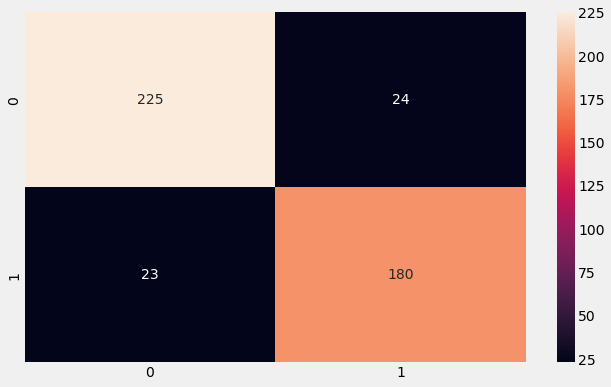

In [192]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

# AUC ROC plot

In [ ]:
# from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
plot_roc_curve(GB_model,x_test,y_test)
plt.title('ROC AUC Plot')

# Saving the Model

In [194]:
import joblib
joblib.dump(GB_model,"Insurance-claim-fraud.pkl")

['Insurance-claim-fraud.pkl']